In [ ]:
pip install pandas plotly


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Creating dummy data
data = {
    "Category": ["Revenue", "COGS", "Gross Profit", "Operating Expenses", "Operating Income", "Other Income/Expenses", "Net Income"],
    "Amount": [200000, 80000, 120000, 50000, 70000, 10000, 60000]
}

# Balance Sheet Data
balance_sheet = {
    "Assets": 300000,
    "Liabilities": 150000,
    "Equity": 150000
}

# Cash Flow Data
cash_flow_data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Operating Cash Flow": [5000, 7000, 8000, 6000, 10000, 12000, 15000, 14000, 13000, 16000, 17000, 20000],
    "Investing Cash Flow": [-2000, -3000, -1000, -4000, -5000, -6000, -4000, -5000, -3000, -1000, -2000, -1500],
    "Financing Cash Flow": [1000, -1000, 2000, 1000, -2000, 3000, 1000, -1000, 2000, -1000, 1500, 1000]
}

# Convert data to DataFrame
income_df = pd.DataFrame(data)
cash_flow_df = pd.DataFrame(cash_flow_data)

# Income Statement Bar Chart
income_bar = go.Bar(x=income_df["Category"], y=income_df["Amount"], text=income_df["Amount"], textposition='auto',
                    marker=dict(color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692']),
                    showlegend=False)

# Balance Sheet Pie Chart
balance_pie = go.Pie(labels=list(balance_sheet.keys()), values=list(balance_sheet.values()), textinfo='label+percent',
                     marker=dict(colors=['#FFA07A', '#20B2AA', '#778899']),
                     hole=0.4, hoverinfo='label+value', showlegend=False)

# Cash Flow Line Chart
cash_flow_line = go.Figure()
cash_flow_line.add_trace(go.Scatter(x=cash_flow_df['Month'], y=cash_flow_df['Operating Cash Flow'], mode='lines+markers',
                                    name='Operating Cash Flow', line=dict(color='#636EFA', width=3)))
cash_flow_line.add_trace(go.Scatter(x=cash_flow_df['Month'], y=cash_flow_df['Investing Cash Flow'], mode='lines+markers',
                                    name='Investing Cash Flow', line=dict(color='#EF553B', width=3, dash='dash')))
cash_flow_line.add_trace(go.Scatter(x=cash_flow_df['Month'], y=cash_flow_df['Financing Cash Flow'], mode='lines+markers',
                                    name='Financing Cash Flow', line=dict(color='#00CC96', width=3, dash='dot')))

# Subplots Layout
fig = sp.make_subplots(rows=2, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}],
                                              [{"colspan": 2, "type": "xy"}, None]],
                       subplot_titles=("Income Statement", "Balance Sheet", "Cash Flow Statement"))

# Add traces to subplots
fig.add_trace(income_bar, row=1, col=1)
fig.add_trace(balance_pie, row=1, col=2)

# Add Cash Flow traces to the large chart
for trace in cash_flow_line.data:
    fig.add_trace(trace, row=2, col=1)

# Update layout for aesthetics
fig.update_layout(
    title="Financial Statement Dashboard",
    title_x=0.5,
    height=700,
    margin=dict(t=50, b=30, l=50, r=50),
    showlegend=True,
    legend=dict(x=0.5, y=-0.1, orientation="h"),
    annotations=[
        dict(text="Income Statement", x=0.2, y=1.05, showarrow=False, font=dict(size=12)),
        dict(text="Balance Sheet", x=0.8, y=1.05, showarrow=False, font=dict(size=12)),
        dict(text="Cash Flow Statement", x=0.5, y=0.47, showarrow=False, font=dict(size=12))
    ]
)

# Set the axis titles
fig.update_xaxes(title_text="Categories", row=1, col=1)
fig.update_yaxes(title_text="Amount ($)", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Cash Flow ($)", row=2, col=1)

# Show the dashboard
fig.show()


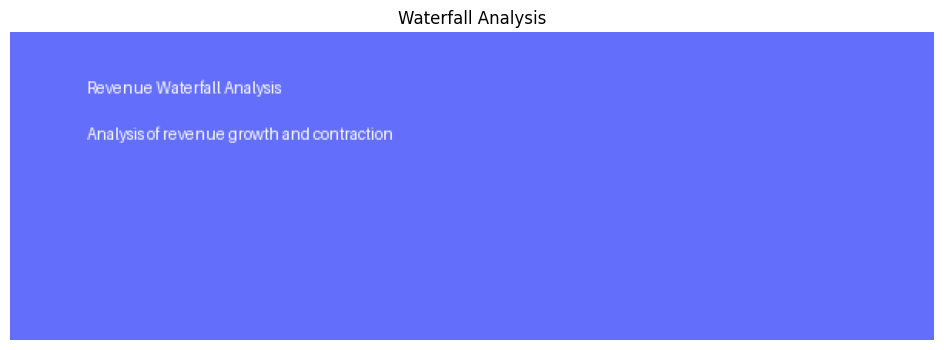

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

# Dummy Data for Revenue Waterfall
data = {
    "Stage": ["Starting Revenue", "Price Increase", "New Product Launch", "Discounts", "Returns", "Final Revenue"],
    "Amount": [100000, 30000, 20000, -15000, -10000, 125000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate intermediate values for waterfall
df['Positive'] = df['Amount'].apply(lambda x: x if x > 0 else 0)
df['Negative'] = df['Amount'].apply(lambda x: x if x < 0 else 0)
df['Cumulative'] = df['Amount'].cumsum()

# Create Waterfall Plotly Chart
waterfall_fig = go.Figure(go.Waterfall(
    x=df['Stage'],
    y=df['Amount'],
    measure=["absolute", "relative", "relative", "relative", "relative", "absolute"],
    text=[f"${x:,.0f}" for x in df['Amount']],
    textposition="outside",
    decreasing={"marker": {"color": "#EF553B", "line": {"color": "#7F7F7F", "width": 2}}},
    increasing={"marker": {"color": "#00CC96", "line": {"color": "#7F7F7F", "width": 2}}},
    totals={"marker": {"color": "#636EFA", "line": {"color": "#7F7F7F", "width": 2}}},
    connector={"line": {"color": "rgb(63, 63, 63)", "dash": "dot"}},
    hoverinfo="text+name",
))

# Update layout for aesthetics
waterfall_fig.update_layout(
    title={
        'text': "Beautiful Revenue Waterfall Analysis",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='midnightblue')
    },
    height=600,
    margin=dict(t=80, b=30, l=50, r=50),
    paper_bgcolor='#F9F9F9',
    plot_bgcolor='#F9F9F9',
    showlegend=False
)

# Create a custom background image for annotations using Pillow
img = Image.new('RGB', (600, 200), color='white')
d = ImageDraw.Draw(img)

# Draw gradient and icons
d.rectangle([0, 0, 600, 200], fill='#636EFA')
d.text((50, 30), "Revenue Waterfall Analysis", fill="white", width=100)
d.text((50, 60), "Analysis of revenue growth and contraction", fill="white", width=100)

# Save the image
img.save("waterfall_bg.png")

# Use Matplotlib for additional annotations on top of Plotly chart
plt.figure(figsize=(12, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Waterfall Analysis')
plt.show()

# Display Plotly Chart
waterfall_fig.show()


In [ ]:
pip install dash plotly pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 52.0 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.graph_objects as go

# Dummy Expense Data
expense_data = pd.DataFrame({
    'Category': ['Salaries', 'Salaries', 'Salaries', 'Marketing', 'Marketing', 'Technology', 'Technology', 'Office Supplies', 'Office Supplies'],
    'Subcategory': ['Base Salary', 'Bonuses', 'Overtime', 'Advertising', 'Promotions', 'Software', 'Hardware', 'Stationery', 'Utilities'],
    'Expense Type': ['Employee Costs', 'Employee Costs', 'Employee Costs', 'Campaign Costs', 'Campaign Costs', 'IT Costs', 'IT Costs', 'Office Costs', 'Office Costs'],
    'Amount': [60000, 15000, 5000, 20000, 12000, 18000, 10000, 3000, 2000]
})

# Initialize Dash App
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Expense Breakdown Dashboard", style={'textAlign': 'center', 'color': '#004d7a', 'fontSize': 36}),

    # First Row: Treemap and Sunburst
    html.Div([
        dcc.Graph(
            id='treemap-chart',
            style={'width': '48%', 'display': 'inline-block', 'padding': '0 20'}
        ),
        dcc.Graph(
            id='sunburst-chart',
            style={'width': '48%', 'display': 'inline-block', 'padding': '0 20'}
        ),
    ]),

    # Second Row: Donut Chart
    html.Div([
        dcc.Graph(
            id='donut-chart',
            style={'width': '48%', 'display': 'inline-block', 'padding': '20 20'}
        ),

        # Expense Summary Table
        html.Div([
            html.H3("Expense Summary", style={'color': '#004d7a'}),
            html.Table(id='summary-table', style={'border': '1px solid #004d7a', 'width': '90%', 'margin': 'auto'}),
        ], style={'width': '48%', 'display': 'inline-block', 'padding': '20 20'})
    ])
])

# Callbacks for Interactive Graphs
@app.callback(
    [Output('treemap-chart', 'figure'),
     Output('sunburst-chart', 'figure'),
     Output('donut-chart', 'figure'),
     Output('summary-table', 'children')],
    [Input('treemap-chart', 'hoverData')]
)
def update_charts(hoverData):
    # Create Treemap Figure
    treemap_fig = go.Figure(go.Treemap(
        labels=expense_data['Subcategory'],
        parents=expense_data['Expense Type'],
        values=expense_data['Amount'],
        marker=dict(colors=expense_data['Amount'], colorscale='Viridis'),
        hoverinfo='label+value+percent parent',
    ))
    treemap_fig.update_layout(title="Expense Distribution by Subcategory", margin=dict(t=50, l=25, r=25, b=25))

    # Create Sunburst Figure for drilling into categories
    sunburst_fig = go.Figure(go.Sunburst(
        labels=expense_data['Subcategory'],
        parents=expense_data['Category'],
        values=expense_data['Amount'],
        branchvalues="total",
        hoverinfo='label+value+percent parent',
        marker=dict(colors=expense_data['Amount'], colorscale='Blues')
    ))
    sunburst_fig.update_layout(title="Drill-Down Expense Sunburst", margin=dict(t=50, l=25, r=25, b=25))

    # Create Donut Chart Figure
    donut_fig = go.Figure(go.Pie(
        labels=expense_data['Category'].unique(),
        values=expense_data.groupby('Category')['Amount'].sum(),
        hole=0.5,
        hoverinfo='label+percent+value',
        textinfo='label+percent',
        marker=dict(colors=['#66BB6A', '#FFA726', '#29B6F6', '#8E24AA']),
    ))
    donut_fig.update_layout(title="Category Expense Breakdown", margin=dict(t=50, l=25, r=25, b=25))

    # Create Expense Summary Table
    summary_table = [html.Tr([html.Th("Category"), html.Th("Total Amount ($)")])]
    grouped_expenses = expense_data.groupby('Category').sum().reset_index()
    for index, row in grouped_expenses.iterrows():
        summary_table.append(html.Tr([html.Td(row['Category']), html.Td(f"${row['Amount']:,.2f}")]))

    return treemap_fig, sunburst_fig, donut_fig, summary_table

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Creating dummy data for Budget vs. Actuals Analysis
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Budget": [20000, 22000, 25000, 24000, 26000, 28000, 30000, 31000, 32000, 33000, 34000, 35000],
    "Actuals": [18000, 23000, 27000, 20000, 25000, 29000, 31000, 30000, 31000, 33500, 34500, 35500]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Variance'] = df['Actuals'] - df['Budget']
df['Variance Percentage'] = (df['Variance'] / df['Budget']) * 100

# Create a grouped bar chart for Budget vs. Actuals
budget_vs_actuals_bar = go.Figure()

# Adding Budget bars
budget_vs_actuals_bar.add_trace(go.Bar(
    x=df["Month"],
    y=df["Budget"],
    name="Budget",
    marker_color='#636EFA',
    text=[f"${x:,.0f}" for x in df["Budget"]],
    textposition='outside',
    hovertemplate="<b>%{x}</b><br>Budget: %{y:$,.0f}",
))

# Adding Actuals bars
budget_vs_actuals_bar.add_trace(go.Bar(
    x=df["Month"],
    y=df["Actuals"],
    name="Actuals",
    marker_color='#00CC96',
    text=[f"${x:,.0f}" for x in df["Actuals"]],
    textposition='outside',
    hovertemplate="<b>%{x}</b><br>Actuals: %{y:$,.0f}",
))

# Add a line chart for Variance
budget_vs_actuals_bar.add_trace(go.Scatter(
    x=df["Month"],
    y=df["Variance"],
    mode='lines+markers',
    name="Variance ($)",
    line=dict(color='crimson', width=4, dash='dot'),
    marker=dict(size=10),
    text=[f"Variance: ${x:,.0f}" for x in df["Variance"]],
    hovertemplate="<b>%{x}</b><br>%{text}",
))

# Add a second y-axis for Variance Percentage
budget_vs_actuals_bar.add_trace(go.Scatter(
    x=df["Month"],
    y=df["Variance Percentage"],
    mode='lines+markers',
    name="Variance (%)",
    line=dict(color='orange', width=4, dash='dash'),
    marker=dict(size=10, symbol='triangle-up'),
    yaxis="y2",
    text=[f"Variance: {x:.2f}%" for x in df["Variance Percentage"]],
    hovertemplate="<b>%{x}</b><br>%{text}",
))

# Update layout for aesthetics
budget_vs_actuals_bar.update_layout(
    title={
        'text': "Budget vs. Actuals Analysis with Variance",
        'y': 0.92,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='midnightblue')
    },
    height=600,
    margin=dict(t=80, b=50, l=50, r=50),
    paper_bgcolor='#F5F5F5',
    plot_bgcolor='#F5F5F5',
    xaxis=dict(title="Month", showgrid=False, tickfont=dict(size=12)),
    yaxis=dict(
        title="Amount ($)",
        showgrid=False,
        tickfont=dict(size=12),
        titlefont=dict(size=14, color='midnightblue')
    ),
    yaxis2=dict(
        title="Variance (%)",
        overlaying='y',
        side='right',
        showgrid=False,
        titlefont=dict(size=14, color='orange'),
        tickfont=dict(size=12, color='orange')
    ),
    legend=dict(x=0.5, y=-0.15, orientation="h"),
)

# Customize bar width and gap
budget_vs_actuals_bar.update_traces(marker_line_width=1.5, marker_line_color='black')
budget_vs_actuals_bar.update_layout(bargap=0.15)

# Add annotations for visual impact
annotations = [
    dict(
        x="Jun",
        y=df.loc[df['Month'] == "Jun", 'Variance'].values[0],
        text=f"High Deviation in June!",
        showarrow=True,
        arrowhead=7,
        ax=0,
        ay=-40,
        font=dict(color="crimson", size=12),
        bordercolor="crimson",
        borderwidth=2
    ),
    dict(
        x="Nov",
        y=df.loc[df['Month'] == "Nov", 'Variance'].values[0],
        text=f"Variance turning positive",
        showarrow=True,
        arrowhead=7,
        ax=0,
        ay=-40,
        font=dict(color="orange", size=12),
        bordercolor="orange",
        borderwidth=2
    )
]

budget_vs_actuals_bar.update_layout(annotations=annotations)

# Show the chart
budget_vs_actuals_bar.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc, html, Input, Output

# Dummy Data for Headcount Analysis
data = {
    "Department": ["HR", "HR", "Finance", "Finance", "Finance", "IT", "IT", "IT", "IT", "Marketing", "Marketing"],
    "Sub-Department": ["Recruitment", "Operations", "Payroll", "Accounting", "Analysis", "Development", "Security", "Support", "Data Science", "Advertising", "Brand Management"],
    "Job Level": ["Entry", "Mid", "Entry", "Mid", "Senior", "Entry", "Mid", "Senior", "Senior", "Mid", "Senior"],
    "Region": ["North America", "North America", "Europe", "Asia", "Europe", "North America", "North America", "Asia", "Europe", "North America", "Asia"],
    "Headcount": [50, 30, 40, 25, 35, 60, 45, 20, 15, 55, 30]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create unique color mapping for departments
department_colors = {
    'HR': '#636EFA',
    'Finance': '#EF553B',
    'IT': '#00CC96',
    'Marketing': '#AB63FA'
}

# Initialize Dash App
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Headcount Analysis Dashboard", style={'textAlign': 'center', 'color': '#004d7a', 'fontSize': 36}),

    # Row 1: Summary Metrics
    html.Div([
        html.Div([
            html.H3("Total Headcount", style={'textAlign': 'center'}),
            html.H2(f"{df['Headcount'].sum()}", style={'textAlign': 'center', 'color': '#004d7a'}),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

        html.Div([
            html.H3("Avg. Headcount per Department", style={'textAlign': 'center'}),
            html.H2(f"{df.groupby('Department')['Headcount'].sum().mean():.2f}", style={'textAlign': 'center', 'color': '#EF553B'}),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

        html.Div([
            html.H3("Total Departments", style={'textAlign': 'center'}),
            html.H2(f"{df['Department'].nunique()}", style={'textAlign': 'center', 'color': '#00CC96'}),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
    ], style={'padding': '20px', 'borderBottom': '2px solid #ddd'}),

    # Row 2: Stacked Bar Chart and Bubble Chart
    html.Div([
        dcc.Graph(
            id='stacked-bar-chart',
            style={'width': '48%', 'display': 'inline-block', 'padding': '0 20'}
        ),
        dcc.Graph(
            id='bubble-chart',
            style={'width': '48%', 'display': 'inline-block', 'padding': '0 20'}
        ),
    ]),

    # Row 3: Treemap Chart
    html.Div([
        dcc.Graph(
            id='treemap-chart',
            style={'width': '100%', 'display': 'inline-block', 'padding': '20 20'}
        ),
    ])
])

# Callbacks to populate the charts dynamically
@app.callback(
    [Output('stacked-bar-chart', 'figure'),
     Output('bubble-chart', 'figure'),
     Output('treemap-chart', 'figure')]
)
def update_charts():
    # Stacked Bar Chart: Headcount by Department and Job Level
    stacked_bar_fig = px.bar(
        df,
        x="Department",
        y="Headcount",
        color="Job Level",
        text="Headcount",
        title="Headcount by Department and Job Level",
        color_discrete_map={'Entry': '#66BB6A', 'Mid': '#FFA726', 'Senior': '#8E24AA'},
    )
    stacked_bar_fig.update_layout(barmode='stack', xaxis_title="Department", yaxis_title="Headcount",
                                  legend_title="Job Level", showlegend=True, paper_bgcolor='#F5F5F5')

    # Bubble Chart: Headcount Density by Region
    bubble_chart_fig = px.scatter(
        df,
        x="Region",
        y="Department",
        size="Headcount",
        color="Department",
        size_max=60,
        title="Headcount Density by Region",
        hover_name="Sub-Department",
        color_discrete_map=department_colors
    )
    bubble_chart_fig.update_layout(xaxis_title="Region", yaxis_title="Department", showlegend=True, paper_bgcolor='#F5F5F5')

    # Treemap Chart: Headcount by Department, Sub-Department, and Skills
    treemap_fig = px.treemap(
        df,
        path=['Department', 'Sub-Department', 'Job Level'],
        values='Headcount',
        color='Department',
        color_discrete_map=department_colors,
        title="Headcount Distribution by Department and Job Level"
    )
    treemap_fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), paper_bgcolor='#F5F5F5')

    return stacked_bar_fig, bubble_chart_fig, treemap_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Create dummy data for Variance Analysis
data = {
    "Category": ["Sales Revenue", "COGS", "Marketing Expenses", "R&D Expenses", "Administrative Expenses", "Other Income/Expenses"],
    "Budget": [100000, 50000, 20000, 30000, 25000, 15000],
    "Actuals": [110000, 45000, 22000, 27000, 28000, 12000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate Variance and Variance Percentage
df['Variance'] = df['Actuals'] - df['Budget']
df['Variance Percentage'] = (df['Variance'] / df['Budget']) * 100
df['Positive Variance'] = df['Variance'].apply(lambda x: x if x > 0 else 0)
df['Negative Variance'] = df['Variance'].apply(lambda x: x if x < 0 else 0)

# Sort data to highlight the most significant variances
df = df.sort_values('Variance', key=abs, ascending=False)

# Create the Butterfly/Tornado Chart using Plotly
fig = go.Figure()

# Add bars for Positive Variance
fig.add_trace(go.Bar(
    x=df['Positive Variance'],
    y=df['Category'],
    orientation='h',
    name='Positive Variance',
    marker=dict(color='#00CC96'),
    text=[f"${x:,.0f}" for x in df['Positive Variance']],
    textposition='inside',
    hovertemplate="<b>%{y}</b><br>Variance: %{x:$,.0f}",
))

# Add bars for Negative Variance
fig.add_trace(go.Bar(
    x=df['Negative Variance'],
    y=df['Category'],
    orientation='h',
    name='Negative Variance',
    marker=dict(color='#EF553B'),
    text=[f"${x:,.0f}" for x in df['Negative Variance']],
    textposition='inside',
    hovertemplate="<b>%{y}</b><br>Variance: %{x:$,.0f}",
))

# Add custom annotations for the total budget vs. actuals
total_budget = df['Budget'].sum()
total_actuals = df['Actuals'].sum()
total_variance = total_actuals - total_budget
total_annotation = f"Total Variance: ${total_variance:,.0f} ({total_variance/total_budget:.2%})"

fig.add_annotation(
    text=total_annotation,
    xref="paper", yref="paper",
    x=0.5, y=-0.2,
    showarrow=False,
    font=dict(size=14, color="black", family="Arial"),
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="#ffffff",
    opacity=0.8
)

# Update layout for aesthetics and a clear view
fig.update_layout(
    title={
        'text': "Variance Analysis: Budget vs. Actuals",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='midnightblue')
    },
    height=600,
    margin=dict(t=100, b=100, l=100, r=100),
    paper_bgcolor='#F5F5F5',
    plot_bgcolor='#F5F5F5',
    barmode='overlay',
    legend=dict(x=0.85, y=1.05, orientation="h"),
    xaxis=dict(title='Variance ($)', showgrid=True, gridwidth=0.5, gridcolor='LightGray'),
    yaxis=dict(title='Expense Category', autorange="reversed"),
)

# Customize hover labels for clarity
fig.update_traces(hoverlabel=dict(font_size=12, font_family="Rockwell"))

# Display the chart
fig.show()


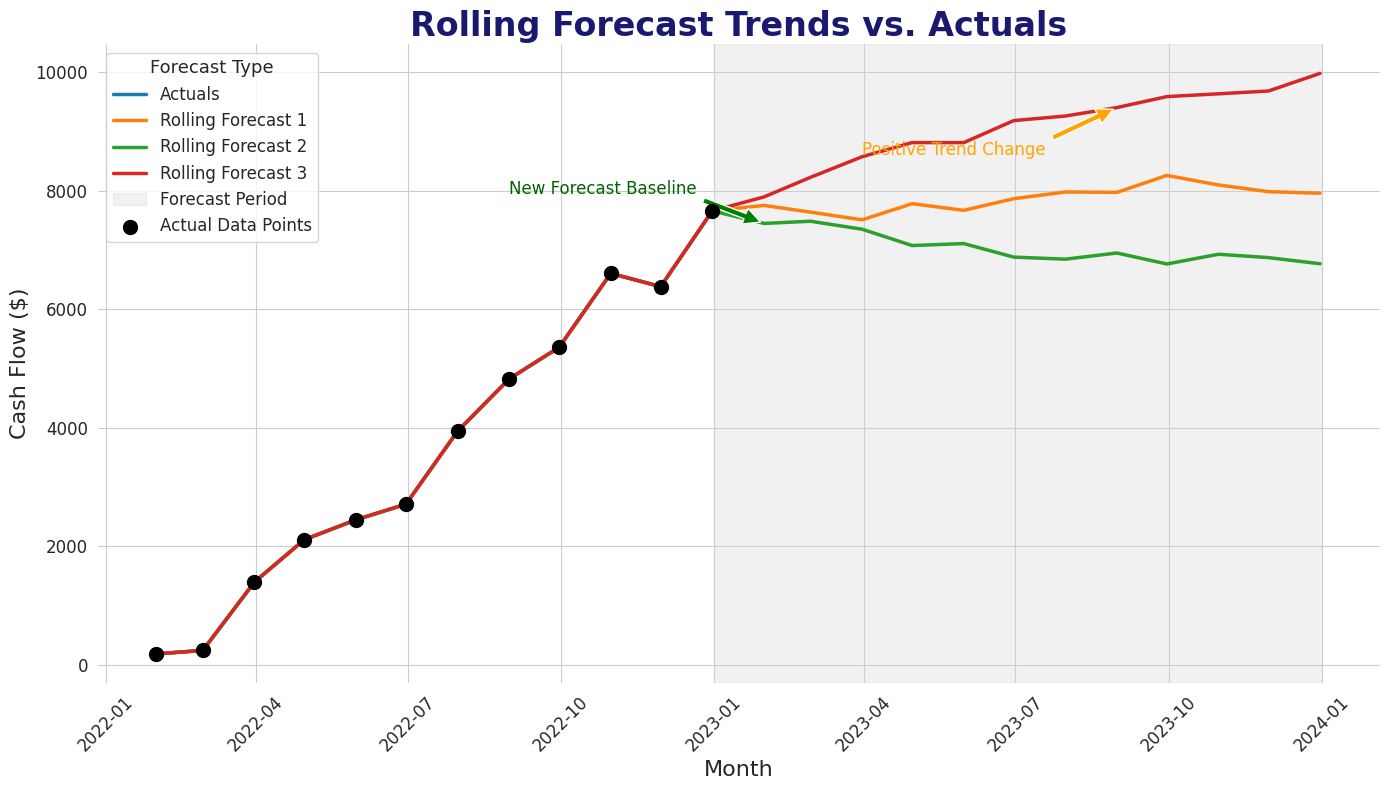

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a rolling forecast dummy dataset
np.random.seed(0)
months = pd.date_range(start='2022-01-01', periods=24, freq='M')

# Generating random historical data
actual_data = np.cumsum(np.random.randint(-500, 1500, size=12))
rolling_forecast_1 = np.concatenate([actual_data, actual_data[-1] + np.cumsum(np.random.randint(-200, 300, size=12))])
rolling_forecast_2 = np.concatenate([actual_data, actual_data[-1] + np.cumsum(np.random.randint(-300, 200, size=12))])
rolling_forecast_3 = np.concatenate([actual_data, actual_data[-1] + np.cumsum(np.random.randint(-100, 400, size=12))])

# Create a DataFrame
df = pd.DataFrame({
    'Month': months,
    'Actuals': np.concatenate([actual_data, [np.nan] * 12]),
    'Rolling Forecast 1': rolling_forecast_1,
    'Rolling Forecast 2': rolling_forecast_2,
    'Rolling Forecast 3': rolling_forecast_3
})

# Melt the DataFrame for Seaborn
df_melted = df.melt(id_vars='Month', var_name='Type', value_name='Amount')

# Convert the 'Month' column to datetime format (ensures proper handling by Matplotlib)
df['Month'] = pd.to_datetime(df['Month'])
df_melted['Month'] = pd.to_datetime(df_melted['Month'])

# Set up the Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create the main line plot using Seaborn
sns.lineplot(x='Month', y='Amount', hue='Type', data=df_melted, linewidth=2.5,
             palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Highlight the forecast area for better visual effect
plt.axvspan(pd.to_datetime('2023-01-01'), pd.to_datetime('2024-01-01'), color='lightgray', alpha=0.3, label='Forecast Period')

# Add individual markers for each actual data point
plt.scatter(df['Month'][:12], df['Actuals'][:12], color='black', s=100, zorder=10, label='Actual Data Points')

# Add annotations for major turning points or forecast changes
plt.annotate('New Forecast Baseline',
             xy=(pd.to_datetime('2023-01-31'), df.loc[df['Month'] == pd.to_datetime('2023-01-31'), 'Rolling Forecast 2'].values[0]),
             xytext=(pd.to_datetime('2022-08-31'), df.loc[df['Month'] == pd.to_datetime('2023-01-31'), 'Rolling Forecast 2'].values[0] + 500),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='darkgreen')

plt.annotate('Positive Trend Change',
             xy=(pd.to_datetime('2023-08-31'), df.loc[df['Month'] == pd.to_datetime('2023-08-31'), 'Rolling Forecast 3'].values[0]),
             xytext=(pd.to_datetime('2023-03-31'), df.loc[df['Month'] == pd.to_datetime('2023-08-31'), 'Rolling Forecast 3'].values[0] - 800),
             arrowprops=dict(facecolor='orange', shrink=0.05), fontsize=12, color='orange')

# Formatting aesthetics
plt.title("Rolling Forecast Trends vs. Actuals", fontsize=24, fontweight='bold', color='midnightblue')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Cash Flow ($)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Forecast Type', fontsize=12, title_fontsize='13', loc='upper left')
sns.despine(left=True, bottom=True)

# Final layout adjustments and show plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


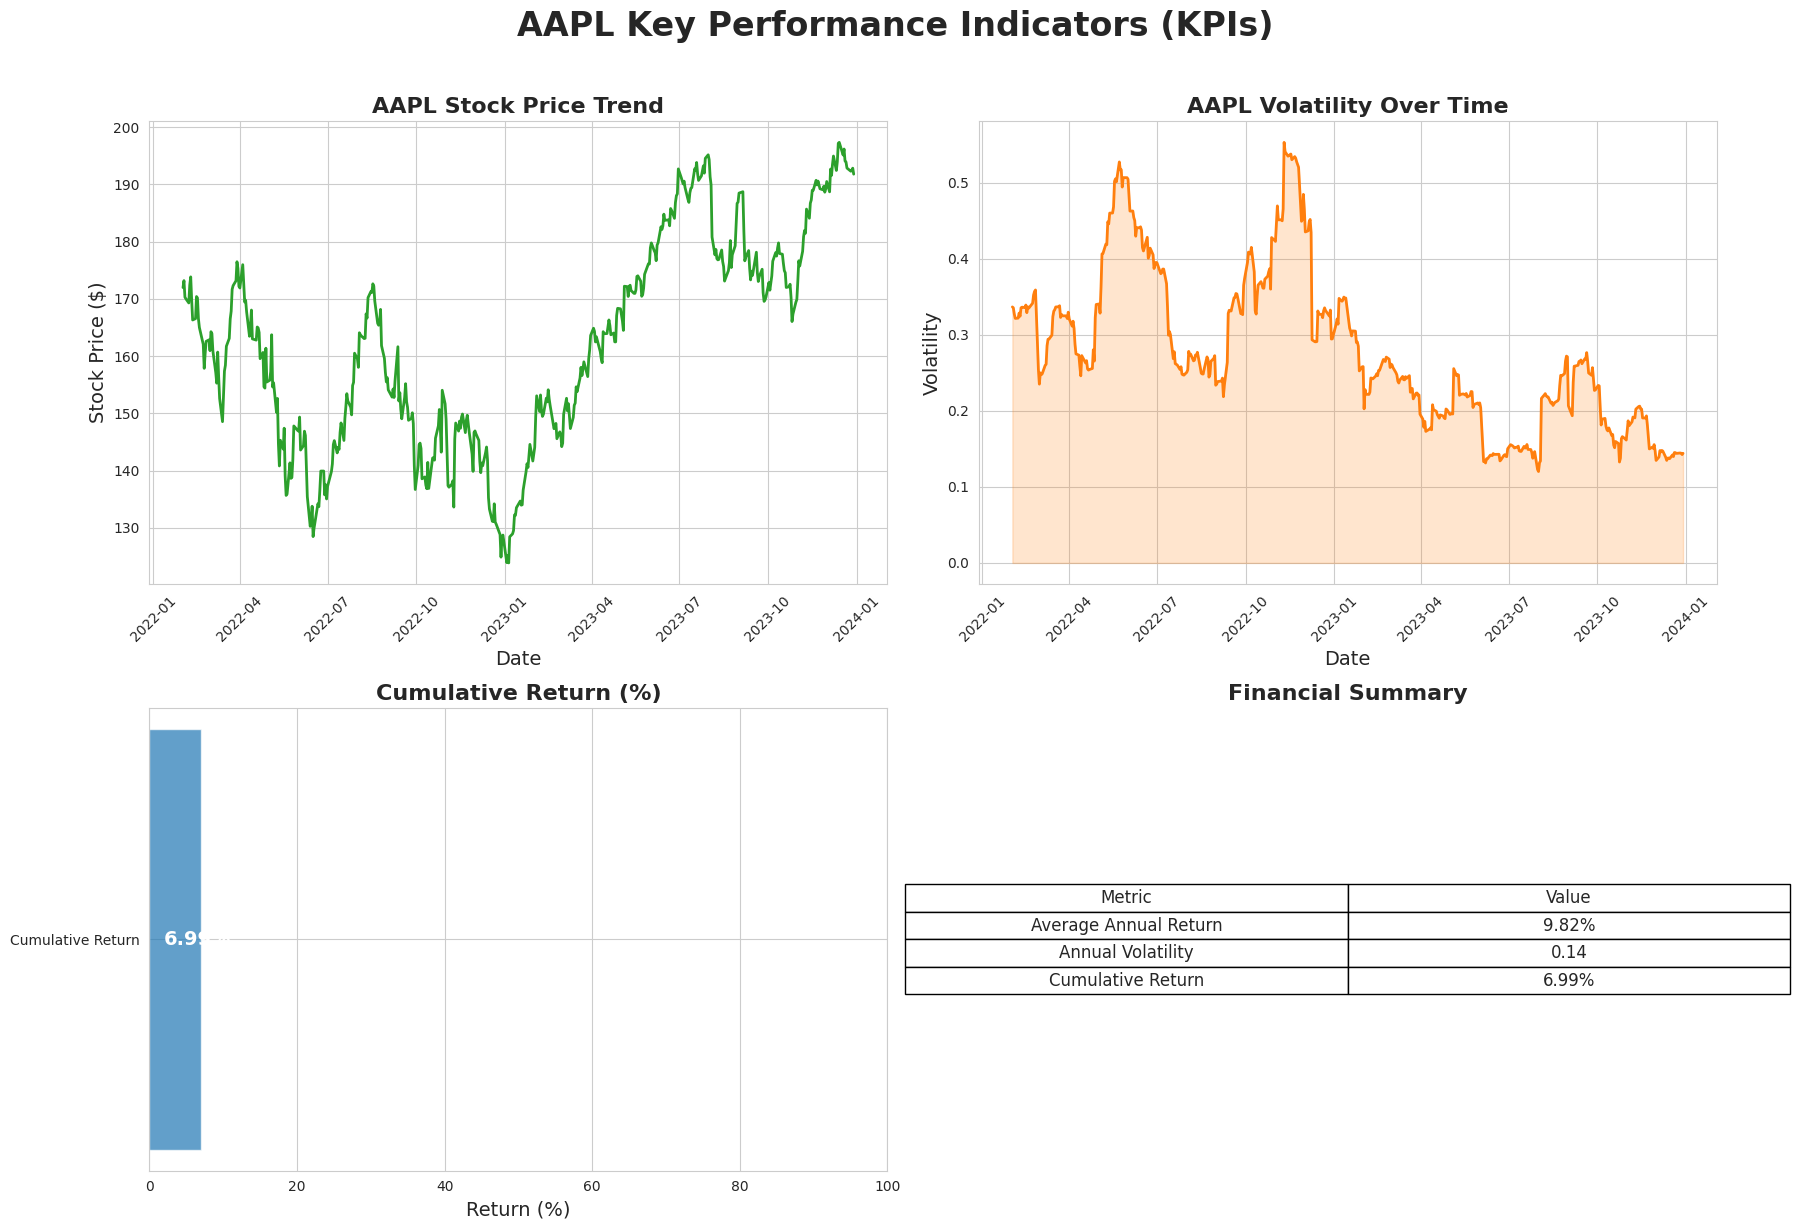

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download stock data for Apple (AAPL)
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2022-01-01', end='2023-12-31')

# Calculate additional financial metrics
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
stock_data['Cumulative Return'] = (1 + stock_data['Daily Return']).cumprod() - 1
stock_data['Volatility'] = stock_data['Daily Return'].rolling(window=20).std() * np.sqrt(252)
stock_data.dropna(inplace=True)

# Calculate average returns and volatility
avg_return = stock_data['Daily Return'].mean() * 252
cumulative_return = stock_data['Cumulative Return'].iloc[-1]
annual_volatility = stock_data['Volatility'].iloc[-1]

# Set up the Seaborn style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Create a 2x2 grid for the KPIs

# KPI 1: Stock Price Trend
sns.lineplot(ax=axes[0, 0], x=stock_data.index, y=stock_data['Adj Close'], color='#2ca02c', linewidth=2)
axes[0, 0].set_title(f"{ticker} Stock Price Trend", fontsize=16, weight='bold')
axes[0, 0].set_xlabel("Date", fontsize=14)
axes[0, 0].set_ylabel("Stock Price ($)", fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# KPI 2: Volatility Chart
sns.lineplot(ax=axes[0, 1], x=stock_data.index, y=stock_data['Volatility'], color='#ff7f0e', linewidth=2)
axes[0, 1].set_title(f"{ticker} Volatility Over Time", fontsize=16, weight='bold')
axes[0, 1].set_xlabel("Date", fontsize=14)
axes[0, 1].set_ylabel("Volatility", fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].fill_between(stock_data.index, stock_data['Volatility'], color='#ff7f0e', alpha=0.2)

# KPI 3: Performance Gauge (Using a horizontal bar to simulate a gauge)
axes[1, 0].barh(["Cumulative Return"], [cumulative_return * 100], color='#1f77b4', alpha=0.7)
axes[1, 0].set_xlim([0, 100])
axes[1, 0].set_title("Cumulative Return (%)", fontsize=16, weight='bold')
axes[1, 0].set_xlabel("Return (%)", fontsize=14)
axes[1, 0].text(cumulative_return * 100 - 5, 0, f"{cumulative_return*100:.2f}%", fontsize=14, va='center', color='white', weight='bold')

# KPI 4: Financial Summary Table
financial_summary = pd.DataFrame({
    'Metric': ['Average Annual Return', 'Annual Volatility', 'Cumulative Return'],
    'Value': [f"{avg_return*100:.2f}%", f"{annual_volatility:.2f}", f"{cumulative_return*100:.2f}%"]
})

# Draw the table
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=financial_summary.values, colLabels=financial_summary.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
axes[1, 1].set_title("Financial Summary", fontsize=16, weight='bold')

# Display all KPIs in the grid layout
plt.suptitle(f"{ticker} Key Performance Indicators (KPIs)", fontsize=24, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


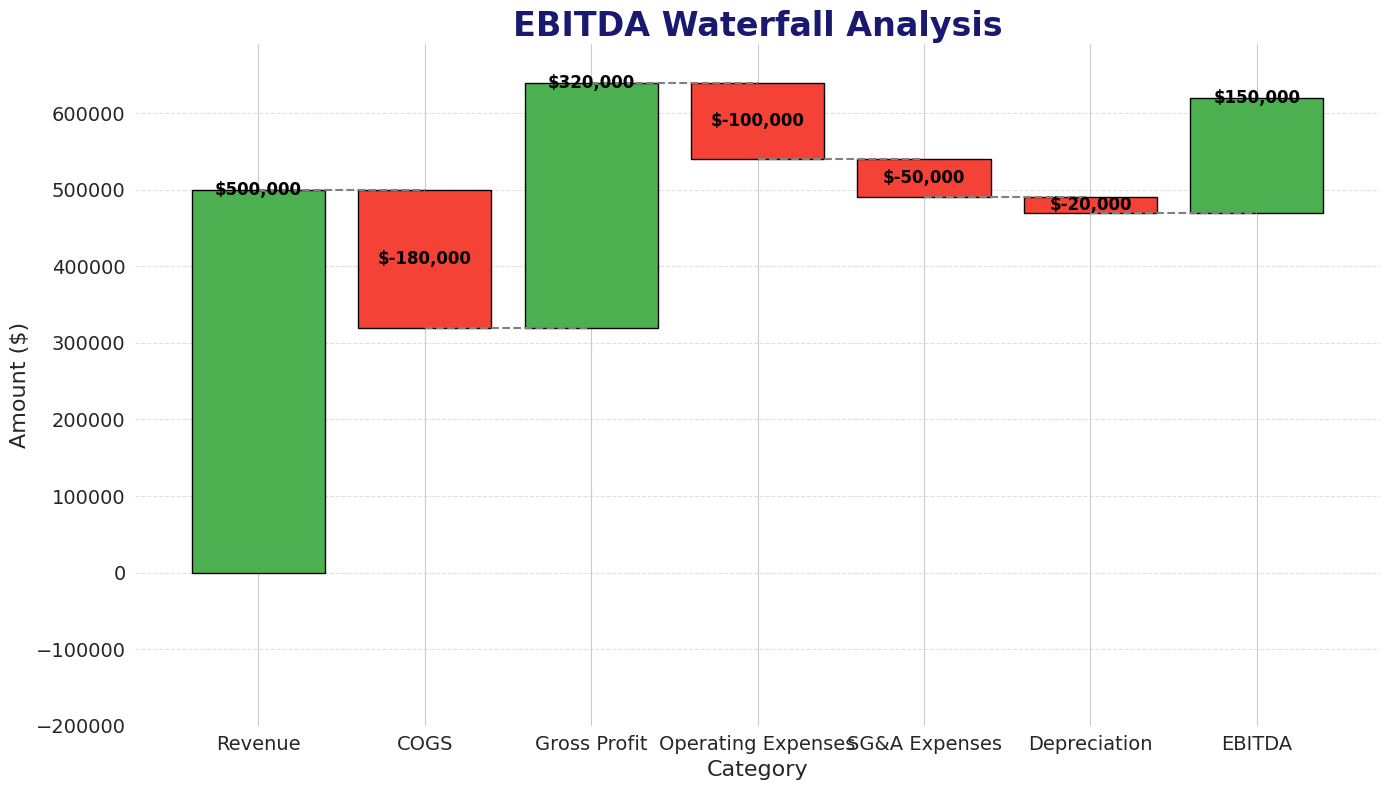

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dummy Data for EBITDA Waterfall
data = {
    "Category": ["Revenue", "COGS", "Gross Profit", "Operating Expenses", "SG&A Expenses", "Depreciation", "EBITDA"],
    "Amount": [500000, -180000, 320000, -100000, -50000, -20000, 150000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate cumulative values for waterfall steps
df['Start'] = df['Amount'].cumsum().shift(1).fillna(0)
df['End'] = df['Amount'].cumsum()
df['Color'] = ['#4CAF50' if x >= 0 else '#F44336' for x in df['Amount']]  # Green for positive, Red for negative

# Set up the Seaborn style
sns.set_style("whitegrid")

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each segment of the waterfall chart
for i, row in df.iterrows():
    ax.bar(row['Category'], row['Amount'], bottom=row['Start'], color=row['Color'], edgecolor='black')

# Add annotations to indicate the value of each segment
for i, row in df.iterrows():
    ax.text(i, row['End'] if row['Amount'] > 0 else row['End'] - row['Amount'] / 2,
            f"${row['Amount']:,.0f}",
            ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Draw connecting lines between bars to simulate the waterfall flow
for i in range(1, len(df)):
    ax.plot([i-1, i], [df['End'][i-1], df['Start'][i]], color='gray', linewidth=1.5, linestyle='--')

# Formatting and aesthetics
ax.set_title("EBITDA Waterfall Analysis", fontsize=24, weight='bold', color='midnightblue')
ax.set_xlabel("Category", fontsize=16)
ax.set_ylabel("Amount ($)", fontsize=16)
ax.set_ylim(min(df['End'].min(), df['Amount'].min()) - 20000, df['End'].max() + 50000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)

# Show the final plot
plt.tight_layout()
plt.show()


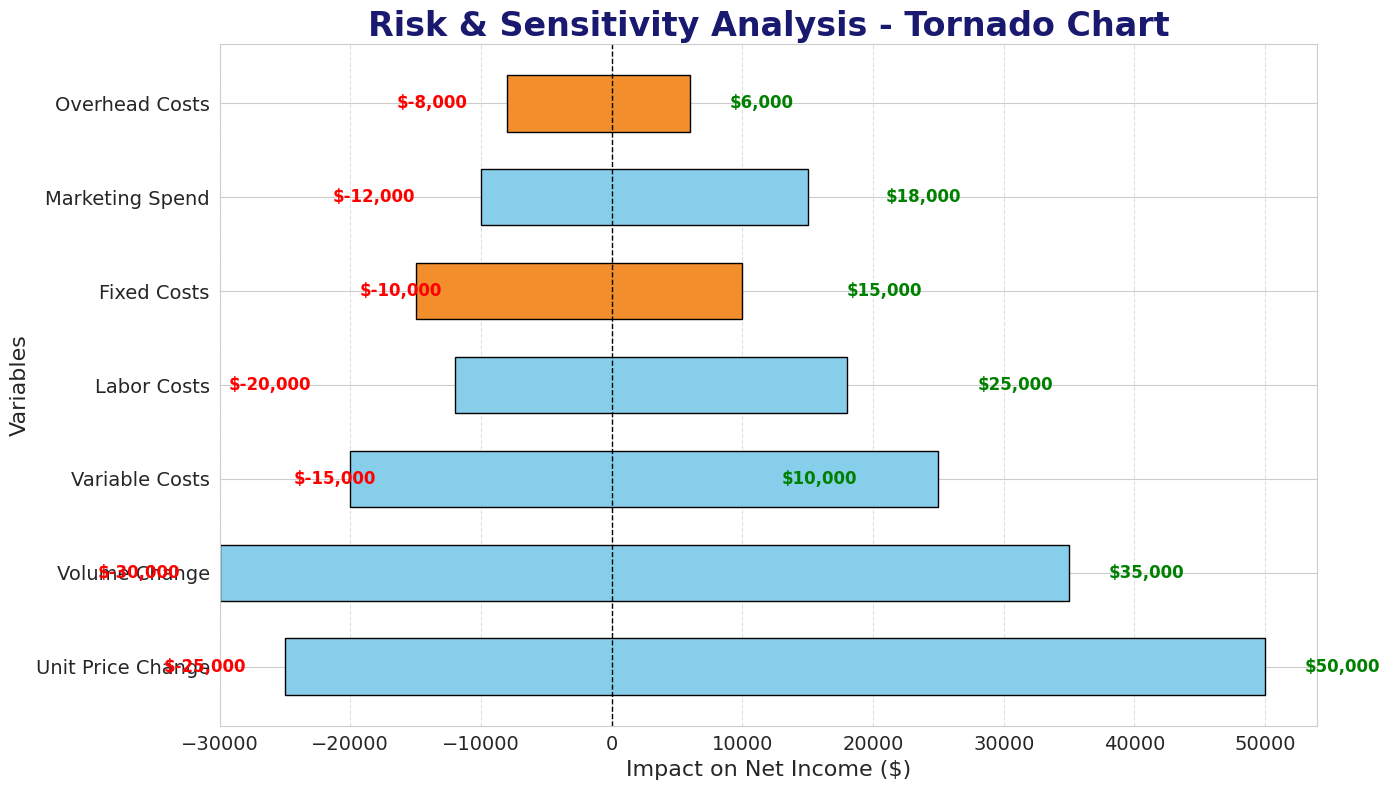

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dummy dataset for Sensitivity Analysis
data = {
    "Variable": [
        "Unit Price Change", "Volume Change", "Fixed Costs", "Variable Costs",
        "Marketing Spend", "Labor Costs", "Overhead Costs"
    ],
    "Min Impact": [-25000, -30000, -15000, -20000, -10000, -12000, -8000],
    "Max Impact": [50000, 35000, 10000, 25000, 15000, 18000, 6000]
}

# Convert to a DataFrame
df = pd.DataFrame(data)
df['Impact Range'] = df['Max Impact'] - df['Min Impact']
df['Center'] = (df['Min Impact'] + df['Max Impact']) / 2

# Sort by absolute impact range for visual clarity
df = df.sort_values('Impact Range', ascending=False)

# Set up the Seaborn style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))

# Create the Tornado Chart with horizontal bars
for idx, row in df.iterrows():
    ax.barh(row['Variable'], row['Impact Range'], left=row['Min Impact'],
            height=0.6, color='skyblue' if row['Max Impact'] > abs(row['Min Impact']) else '#F28E2B',
            edgecolor='black')

# Add annotations to show the exact impact range on each bar
for i, row in df.iterrows():
    ax.text(row['Min Impact'] - 3000, i, f"${row['Min Impact']:,.0f}", va='center', ha='right', color='red', fontsize=12, fontweight='bold')
    ax.text(row['Max Impact'] + 3000, i, f"${row['Max Impact']:,.0f}", va='center', ha='left', color='green', fontsize=12, fontweight='bold')

# Formatting and aesthetics
ax.set_title("Risk & Sensitivity Analysis - Tornado Chart", fontsize=24, weight='bold', color='midnightblue')
ax.set_xlabel("Impact on Net Income ($)", fontsize=16)
ax.set_ylabel("Variables", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.6)

# Display the Tornado Chart
plt.tight_layout()
plt.show()


<ipython-input-18-82b58ae36301>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




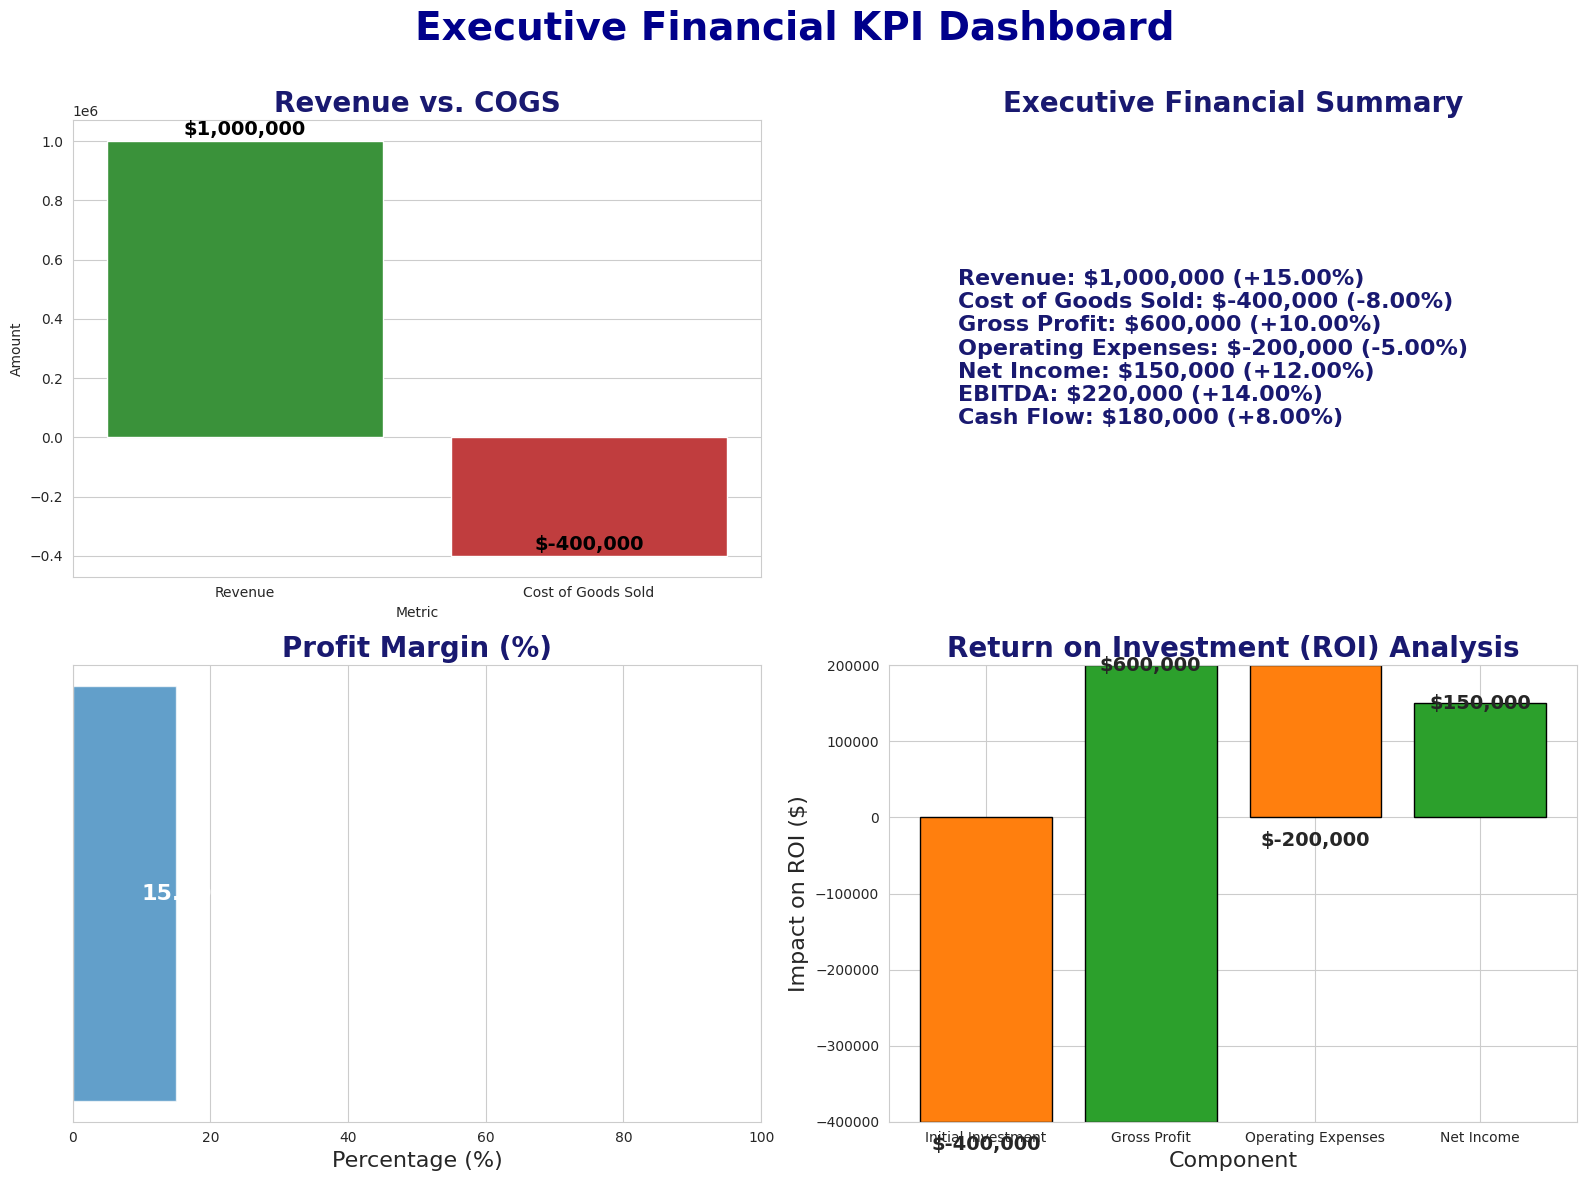

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dummy Financial Data for Executive Dashboard
data = {
    "Metric": ["Revenue", "Cost of Goods Sold", "Gross Profit", "Operating Expenses", "Net Income", "EBITDA", "Cash Flow"],
    "Amount": [1000000, -400000, 600000, -200000, 150000, 220000, 180000],
    "Indicator": [0.15, -0.08, 0.10, -0.05, 0.12, 0.14, 0.08]  # Example % change indicators
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a secondary DataFrame for Financial Ratios
ratios = pd.DataFrame({
    "KPI": ["Profit Margin", "ROI", "EBITDA Margin", "Cash Flow Margin"],
    "Value": [0.15, 0.18, 0.22, 0.14]
})

# Set up Seaborn style for a clean look
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Create a 2x2 grid for the KPIs

# KPI 1: Revenue vs. Profit Comparison (Dual Bar Chart)
sns.barplot(ax=axes[0, 0], x=df['Metric'][:2], y=df['Amount'][:2], palette=['#2ca02c', '#d62728'])
axes[0, 0].set_title("Revenue vs. COGS", fontsize=20, weight='bold', color='midnightblue')
for index, value in enumerate(df['Amount'][:2]):
    axes[0, 0].text(index, value + 20000, f"${value:,.0f}", ha='center', color='black', fontsize=14, weight='bold')

# KPI 2: Financial Summary with Indicators
summary_text = "\n".join([f"{metric}: ${amount:,.0f} ({indicator:+.2%})" for metric, amount, indicator in zip(df['Metric'], df['Amount'], df['Indicator'])])
axes[0, 1].text(0.1, 0.5, summary_text, ha='left', va='center', fontsize=16, weight='bold', color='midnightblue')
axes[0, 1].set_title("Executive Financial Summary", fontsize=20, weight='bold', color='midnightblue')
axes[0, 1].axis('off')

# KPI 3: Profit Margin Gauge
axes[1, 0].barh(['Profit Margin'], [ratios['Value'][0] * 100], color='#1f77b4', alpha=0.7, height=0.4)
axes[1, 0].set_xlim([0, 100])
axes[1, 0].set_title("Profit Margin (%)", fontsize=20, weight='bold', color='midnightblue')
axes[1, 0].set_xlabel("Percentage (%)", fontsize=16)
axes[1, 0].text(ratios['Value'][0] * 100 - 5, 0, f"{ratios['Value'][0]*100:.2f}%", fontsize=16, va='center', color='white', weight='bold')
axes[1, 0].set_yticks([])

# KPI 4: ROI Waterfall Chart
# Create a Waterfall Effect for ROI Components
roi_components = pd.DataFrame({
    "Component": ["Initial Investment", "Gross Profit", "Operating Expenses", "Net Income"],
    "Amount": [-400000, 600000, -200000, 150000]
})

roi_components['Start'] = roi_components['Amount'].cumsum().shift(1).fillna(0)
roi_components['End'] = roi_components['Amount'].cumsum()
roi_components['Color'] = ['#ff7f0e' if x < 0 else '#2ca02c' for x in roi_components['Amount']]

# Plot the Waterfall Chart
for i, row in roi_components.iterrows():
    axes[1, 1].bar(row['Component'], row['Amount'], bottom=row['Start'], color=row['Color'], edgecolor='black')
    axes[1, 1].text(i, row['End'] if row['Amount'] > 0 else row['End'] - 30000, f"${row['Amount']:,.0f}", ha='center', va='center', fontsize=14, fontweight='bold')

axes[1, 1].set_title("Return on Investment (ROI) Analysis", fontsize=20, weight='bold', color='midnightblue')
axes[1, 1].set_xlabel("Component", fontsize=16)
axes[1, 1].set_ylabel("Impact on ROI ($)", fontsize=16)

# Overall layout and formatting
fig.suptitle("Executive Financial KPI Dashboard", fontsize=28, weight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-19-b296393de585>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



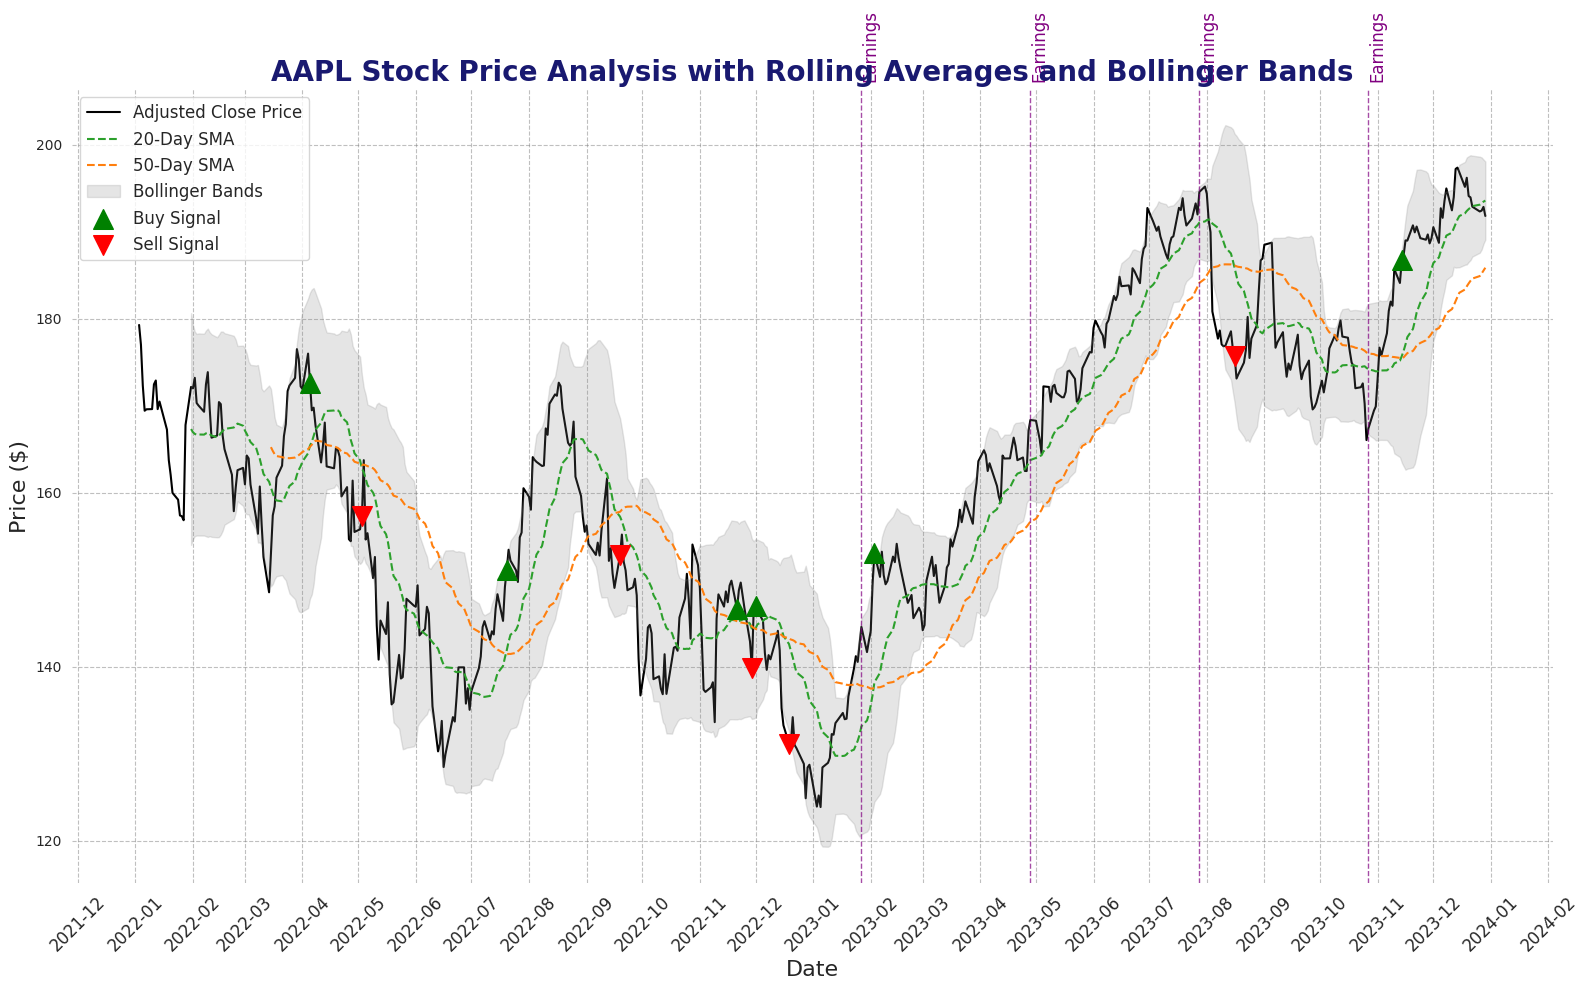

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# Download historical data for a specific stock (e.g., Apple - AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-12-31')

# Calculate Moving Averages and Bollinger Bands
data['20_SMA'] = data['Adj Close'].rolling(window=20).mean()
data['50_SMA'] = data['Adj Close'].rolling(window=50).mean()
data['Bollinger_Upper'] = data['20_SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
data['Bollinger_Lower'] = data['20_SMA'] - 2 * data['Adj Close'].rolling(window=20).std()

# Identify Buy/Sell Signals (when 20-day SMA crosses 50-day SMA)
data['Signal'] = 0
data['Signal'][20:] = np.where(data['20_SMA'][20:] > data['50_SMA'][20:], 1, 0)
data['Position'] = data['Signal'].diff()

# Set up the figure and axis for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

# Plot Candlestick Chart
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='black', linewidth=1.5, zorder=1)

# Plot Rolling Averages
plt.plot(data.index, data['20_SMA'], label='20-Day SMA', color='#2ca02c', linestyle='--', linewidth=1.5)
plt.plot(data.index, data['50_SMA'], label='50-Day SMA', color='#ff7f0e', linestyle='--', linewidth=1.5)

# Plot Bollinger Bands
plt.fill_between(data.index, data['Bollinger_Upper'], data['Bollinger_Lower'], color='gray', alpha=0.2, label='Bollinger Bands')

# Add Buy Signals (where the 20-day SMA crosses above the 50-day SMA)
plt.scatter(data[data['Position'] == 1].index,
            data['Adj Close'][data['Position'] == 1],
            marker='^', color='green', s=200, label='Buy Signal', zorder=2)

# Add Sell Signals (where the 20-day SMA crosses below the 50-day SMA)
plt.scatter(data[data['Position'] == -1].index,
            data['Adj Close'][data['Position'] == -1],
            marker='v', color='red', s=200, label='Sell Signal', zorder=2)

# Highlight Earnings Release Dates (as an example of event annotations)
earnings_dates = pd.to_datetime(['2023-01-27', '2023-04-28', '2023-07-28', '2023-10-27'])
for date in earnings_dates:
    if date in data.index:
        plt.axvline(x=date, color='purple', linestyle='--', linewidth=1, alpha=0.7)
        plt.text(date, data['Adj Close'].max() * 1.05, 'Earnings', rotation=90, color='purple', fontsize=12, va='bottom')

# Formatting the x-axis with date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45, fontsize=12)

# Add titles and labels
plt.title(f"{ticker} Stock Price Analysis with Rolling Averages and Bollinger Bands", fontsize=20, weight='bold', color='midnightblue')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price ($)", fontsize=16)

# Show grid and legend
plt.grid(visible=True, which='major', color='gray', linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='upper left')
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-20-63a80f0dbc9c>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



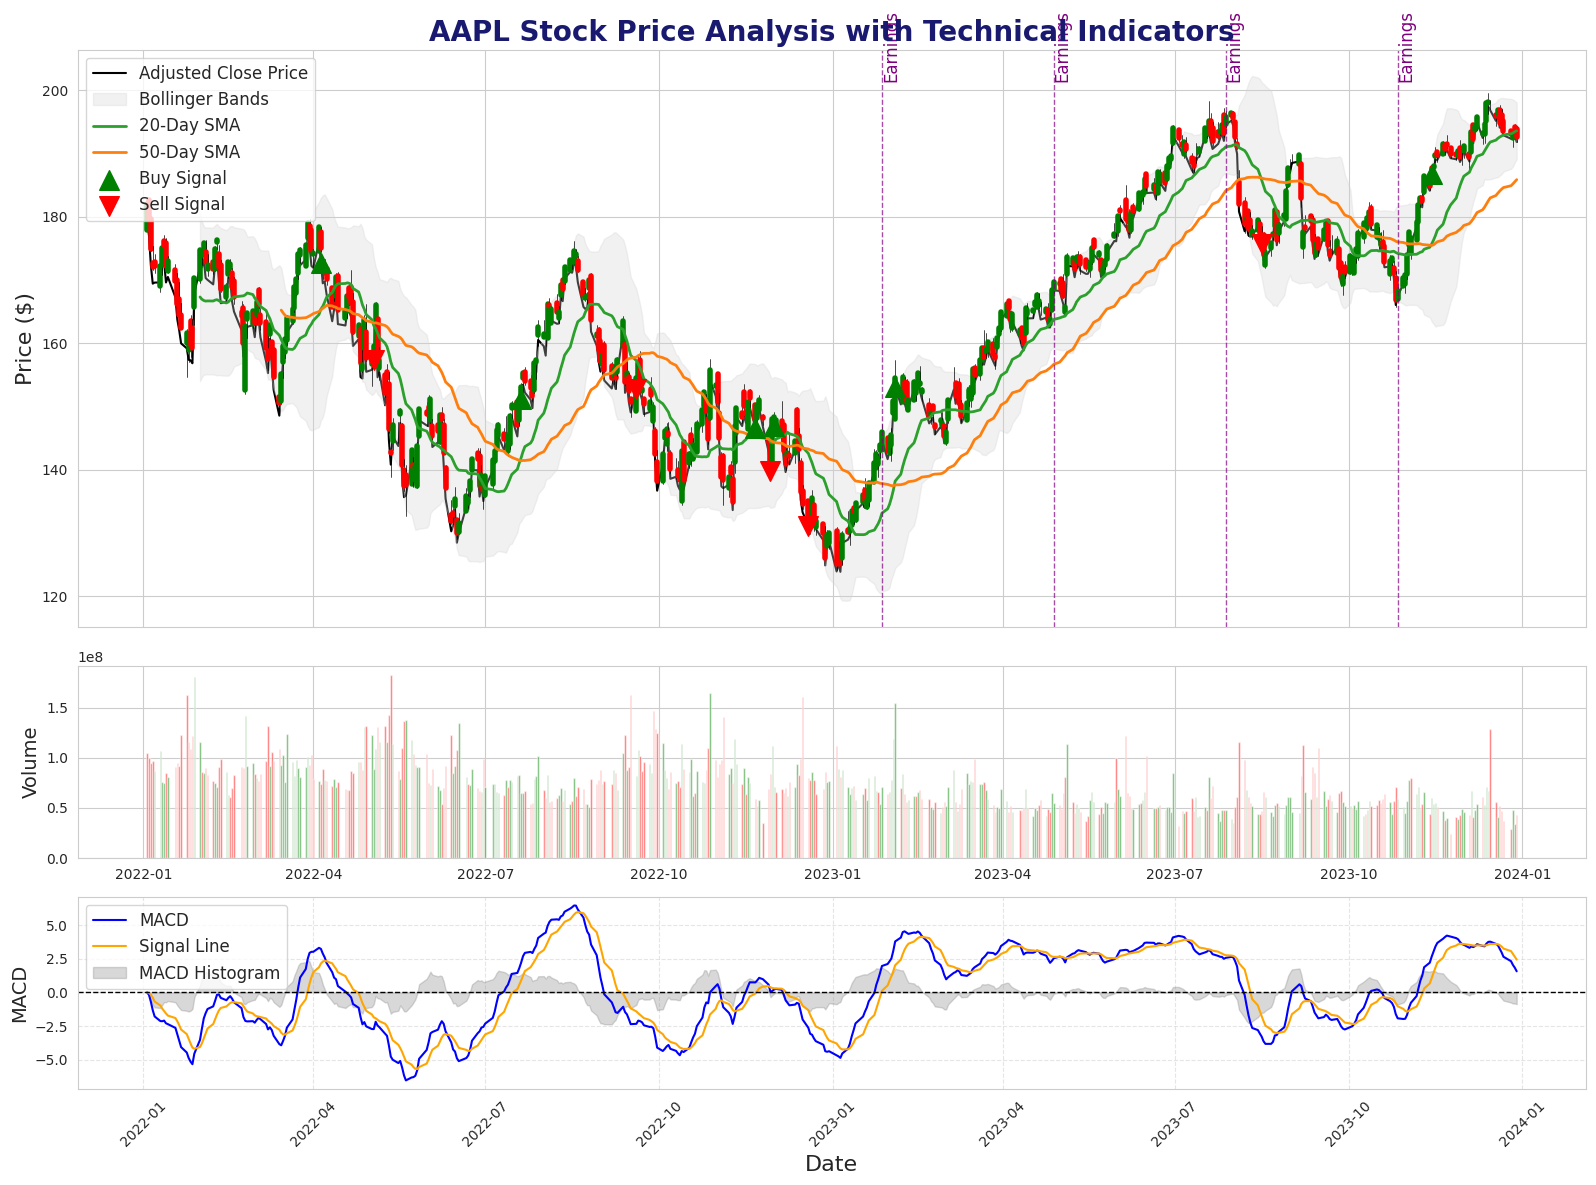

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
from matplotlib import gridspec

# Download historical data for a specific stock (e.g., Apple - AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-12-31')

# Calculate Moving Averages and Bollinger Bands
data['20_SMA'] = data['Adj Close'].rolling(window=20).mean()
data['50_SMA'] = data['Adj Close'].rolling(window=50).mean()
data['Bollinger_Upper'] = data['20_SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
data['Bollinger_Lower'] = data['20_SMA'] - 2 * data['Adj Close'].rolling(window=20).std()

# Calculate MACD
data['12_EMA'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['26_EMA'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['12_EMA'] - data['26_EMA']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Identify Buy/Sell Signals (20-day SMA crosses 50-day SMA)
data['Signal'] = 0
data['Signal'][20:] = np.where(data['20_SMA'][20:] > data['50_SMA'][20:], 1, 0)
data['Position'] = data['Signal'].diff()

# Set up the figure and axes using gridspec
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1])  # Set up a grid: 3 rows, 1 column

# Main Price Chart (Candlestick)
ax1 = plt.subplot(gs[0])
ax1.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='black', linewidth=1.5, zorder=1)

# Candlestick Visualization
for i, row in data.iterrows():
    color = 'green' if row['Open'] < row['Close'] else 'red'
    ax1.plot([row.name, row.name], [row['Low'], row['High']], color='black', linewidth=0.5)  # High-Low Line
    ax1.plot([row.name, row.name], [row['Open'], row['Close']], color=color, linewidth=4)    # Open-Close Line

# Plot Bollinger Bands with gradient fill
ax1.fill_between(data.index, data['Bollinger_Upper'], data['Bollinger_Lower'], color='lightgray', alpha=0.3, label='Bollinger Bands')

# Plot Moving Averages
ax1.plot(data.index, data['20_SMA'], label='20-Day SMA', color='#2ca02c', linestyle='-', linewidth=2)
ax1.plot(data.index, data['50_SMA'], label='50-Day SMA', color='#ff7f0e', linestyle='-', linewidth=2)

# Plot Buy and Sell Signals
ax1.scatter(data[data['Position'] == 1].index,
            data['Adj Close'][data['Position'] == 1],
            marker='^', color='green', s=200, label='Buy Signal', zorder=2)
ax1.scatter(data[data['Position'] == -1].index,
            data['Adj Close'][data['Position'] == -1],
            marker='v', color='red', s=200, label='Sell Signal', zorder=2)

# Highlight Earnings Release Dates
earnings_dates = pd.to_datetime(['2023-01-27', '2023-04-28', '2023-07-28', '2023-10-27'])
for date in earnings_dates:
    if date in data.index:
        ax1.axvline(x=date, color='purple', linestyle='--', linewidth=1, alpha=0.7)
        ax1.text(date, data['Adj Close'].max() * 1.02, 'Earnings', rotation=90, color='purple', fontsize=12, va='bottom')

# Volume Subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.bar(data.index, data['Volume'], color=np.where(data['Adj Close'].diff() > 0, 'green', 'red'), alpha=0.6)
ax2.set_ylabel("Volume", fontsize=14)

# MACD Subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.plot(data.index, data['MACD'], label='MACD', color='blue', linewidth=1.5)
ax3.plot(data.index, data['Signal_Line'], label='Signal Line', color='orange', linewidth=1.5)
ax3.fill_between(data.index, data['MACD'] - data['Signal_Line'], color='gray', alpha=0.3, label='MACD Histogram')
ax3.axhline(0, linestyle='--', color='black', linewidth=1)
ax3.set_ylabel("MACD", fontsize=14)

# Formatting and aesthetics
ax1.set_title(f"{ticker} Stock Price Analysis with Technical Indicators", fontsize=20, weight='bold', color='midnightblue')
ax1.set_ylabel("Price ($)", fontsize=16)
plt.setp(ax1.get_xticklabels(), visible=False)
ax3.set_xlabel("Date", fontsize=16)

# Date Formatting for x-axis
plt.xticks(rotation=45)
ax1.legend(loc='upper left', fontsize=12)
ax3.legend(loc='upper left', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the enhanced plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  11 of 11 completed


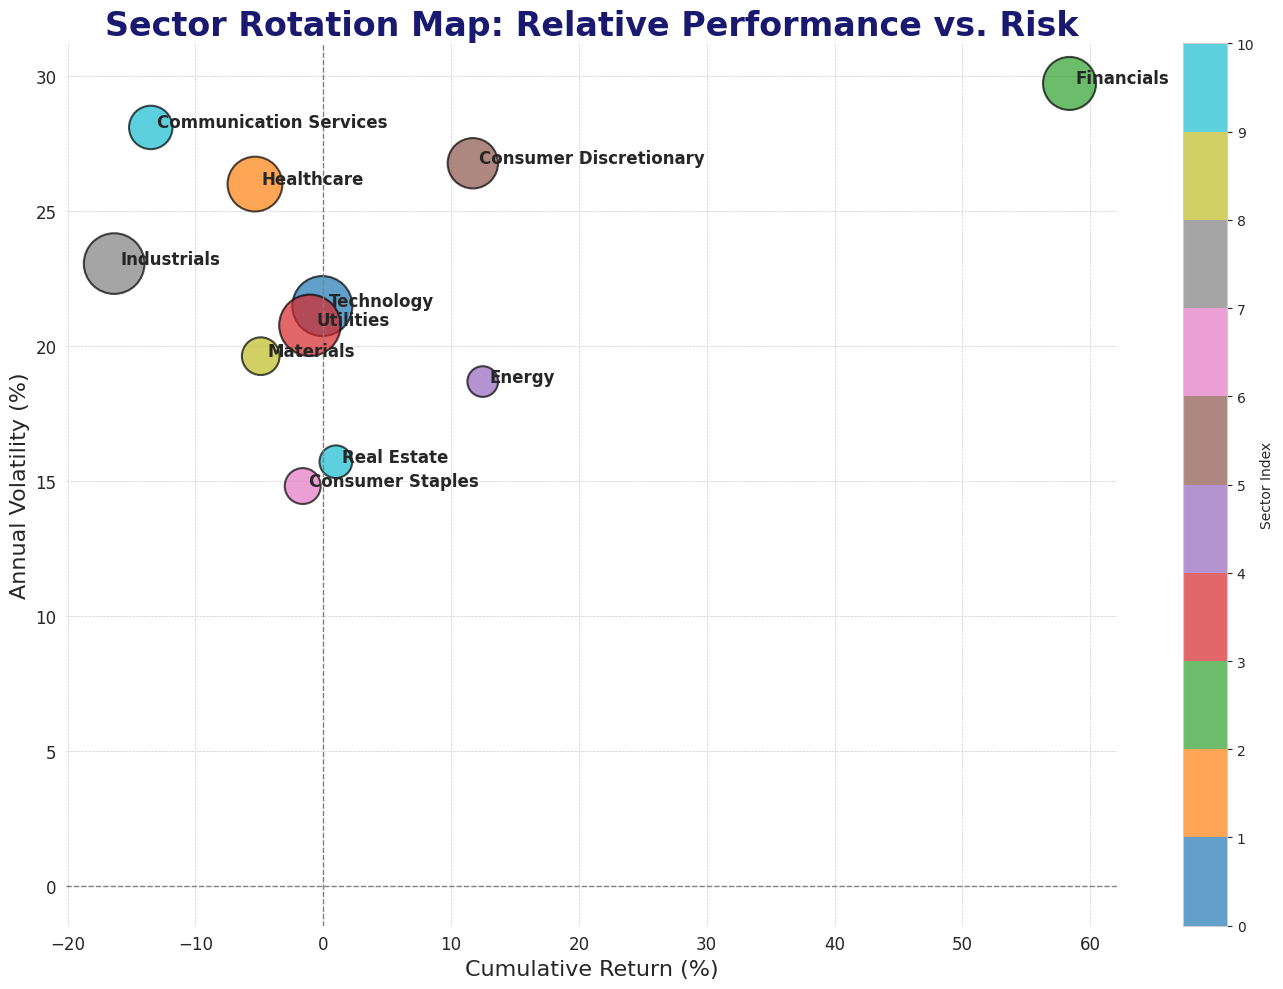

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a list of sector ETFs for analysis
sector_etfs = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Financials': 'XLF',
    'Utilities': 'XLU',
    'Energy': 'XLE',
    'Consumer Discretionary': 'XLY',
    'Consumer Staples': 'XLP',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Real Estate': 'XLRE',
    'Communication Services': 'XLC'
}

# Download historical price data for the sector ETFs over the last year
etf_data = yf.download(list(sector_etfs.values()), start='2022-01-01', end='2023-12-31')['Adj Close']

# Calculate daily returns and annualized volatility for each sector ETF
daily_returns = etf_data.pct_change().dropna()
annual_volatility = daily_returns.std() * np.sqrt(252)  # Annualized volatility

# Calculate cumulative returns over the period
cumulative_returns = (etf_data.iloc[-1] / etf_data.iloc[0]) - 1

# Simulate market capitalization values (in billions) for visualization purposes
market_caps = np.random.uniform(50, 500, len(sector_etfs))

# Create a DataFrame for the scatter plot data
sector_performance = pd.DataFrame({
    'Sector': list(sector_etfs.keys()),
    'Ticker': list(sector_etfs.values()),
    'Cumulative Return': cumulative_returns.values * 100,  # Convert to percentage
    'Annual Volatility': annual_volatility.values * 100,   # Convert to percentage
    'Market Cap (Billions)': market_caps
})

# Create a color palette for the sectors
colors = sns.color_palette("tab10", len(sector_etfs))

# Set up the Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Create a scatter plot with bubble size representing market capitalization
scatter = plt.scatter(
    x=sector_performance['Cumulative Return'],
    y=sector_performance['Annual Volatility'],
    s=sector_performance['Market Cap (Billions)'] * 5,  # Scale bubble size for visibility
    c=range(len(sector_etfs)), cmap='tab10', alpha=0.7, edgecolors='black', linewidth=1.5
)

# Add annotations for each sector
for i, row in sector_performance.iterrows():
    plt.text(row['Cumulative Return'] + 0.5, row['Annual Volatility'], row['Sector'], fontsize=12, fontweight='bold')

# Add titles and labels
plt.title("Sector Rotation Map: Relative Performance vs. Risk", fontsize=24, weight='bold', color='midnightblue')
plt.xlabel("Cumulative Return (%)", fontsize=16)
plt.ylabel("Annual Volatility (%)", fontsize=16)

# Add color bar for sectors
plt.colorbar(scatter, ticks=range(len(sector_etfs)), label='Sector Index', format="%d")

# Add grid and formatting
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  10 of 10 completed


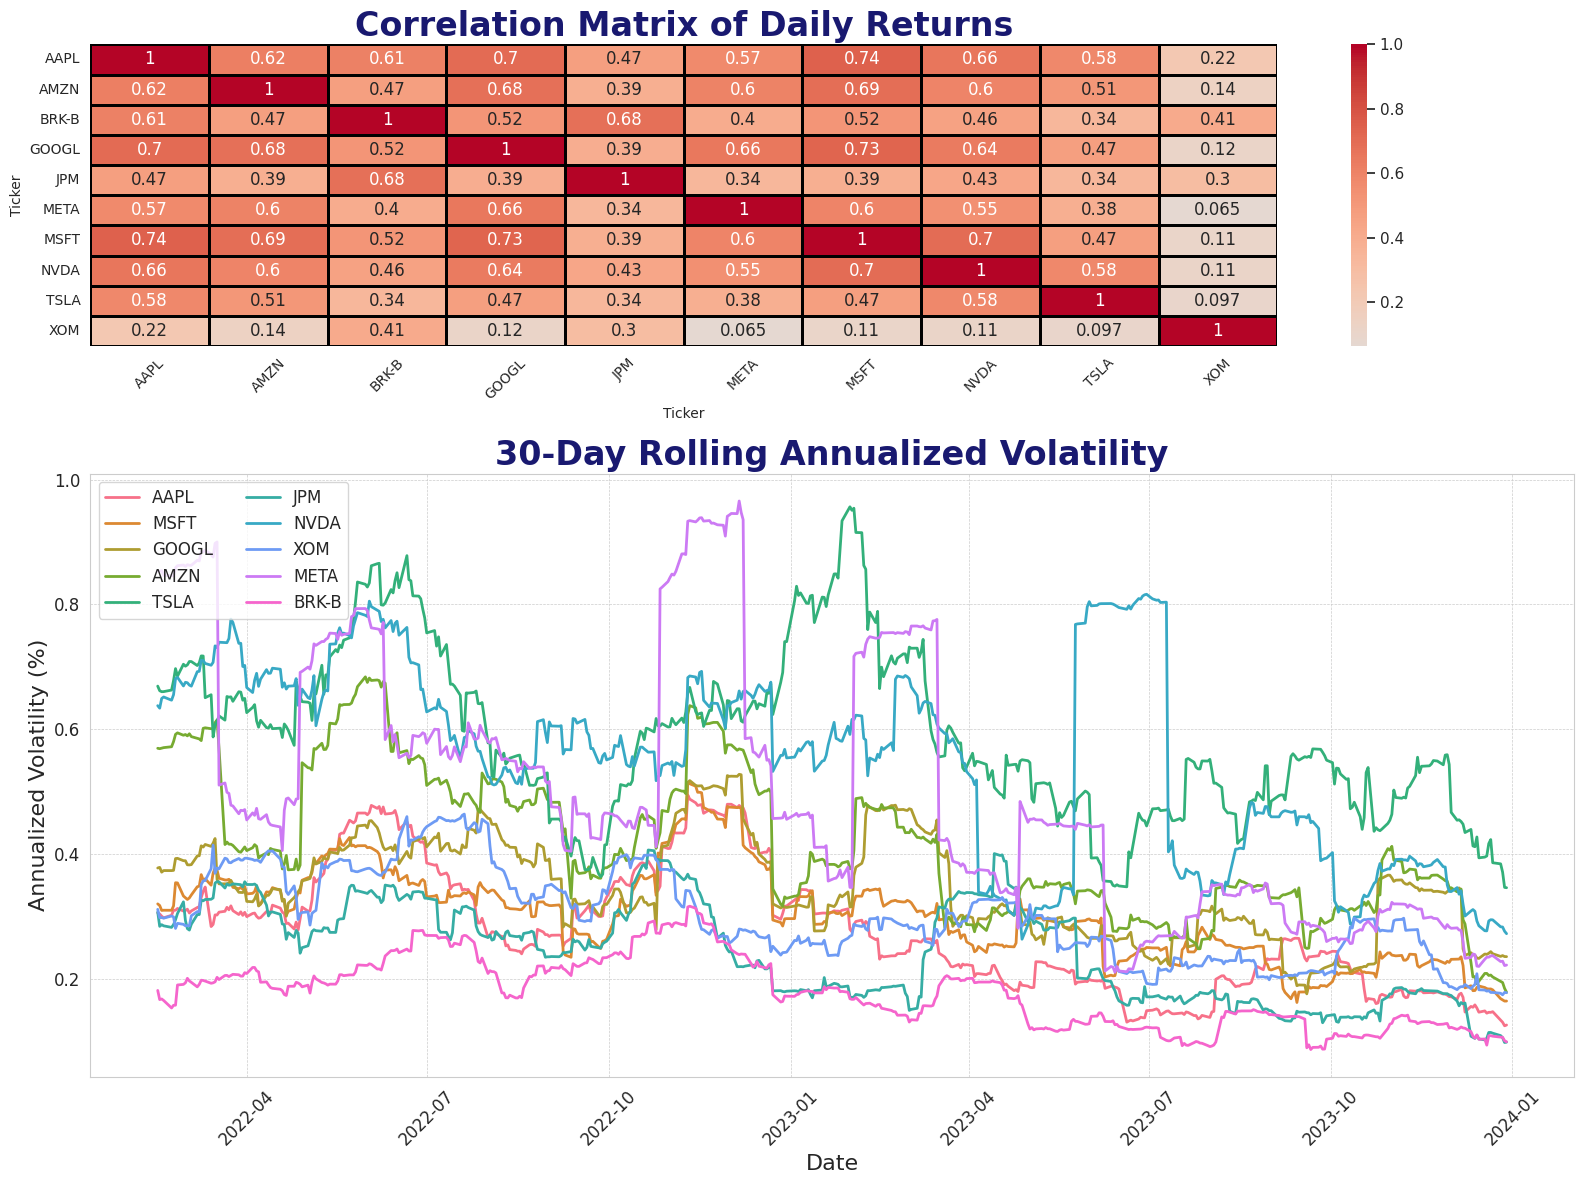

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the tickers of the stocks to be analyzed
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'NVDA', 'XOM', 'META', 'BRK-B']

# Download the historical adjusted closing prices of these stocks over the past 2 years
data = yf.download(tickers, start='2022-01-01', end='2023-12-31')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate the annualized volatility (standard deviation of daily returns * sqrt(252))
volatility = daily_returns.rolling(window=30).std() * np.sqrt(252)

# Create a correlation matrix using the daily returns
correlation_matrix = daily_returns.corr()

# Set up a figure with a 2x1 grid for correlation matrix and historical volatility
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [1, 2]})

# --- Plot 1: Correlation Matrix Heatmap ---
sns.set(style='whitegrid')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax1, annot_kws={"size": 12}, linewidths=1, linecolor='black')
ax1.set_title("Correlation Matrix of Daily Returns", fontsize=24, weight='bold', color='midnightblue')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# --- Plot 2: Historical Volatility Line Plot ---
colors = sns.color_palette("husl", len(tickers))  # Use a different color for each ticker
for i, ticker in enumerate(tickers):
    ax2.plot(volatility.index, volatility[ticker], label=ticker, color=colors[i], linewidth=2)

# Customize the second plot
ax2.set_title("30-Day Rolling Annualized Volatility", fontsize=24, weight='bold', color='midnightblue')
ax2.set_xlabel("Date", fontsize=16)
ax2.set_ylabel("Annualized Volatility (%)", fontsize=16)
ax2.legend(fontsize=12, loc='upper left', ncol=2)
ax2.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Overall layout adjustments
plt.tight_layout()
plt.show()


[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



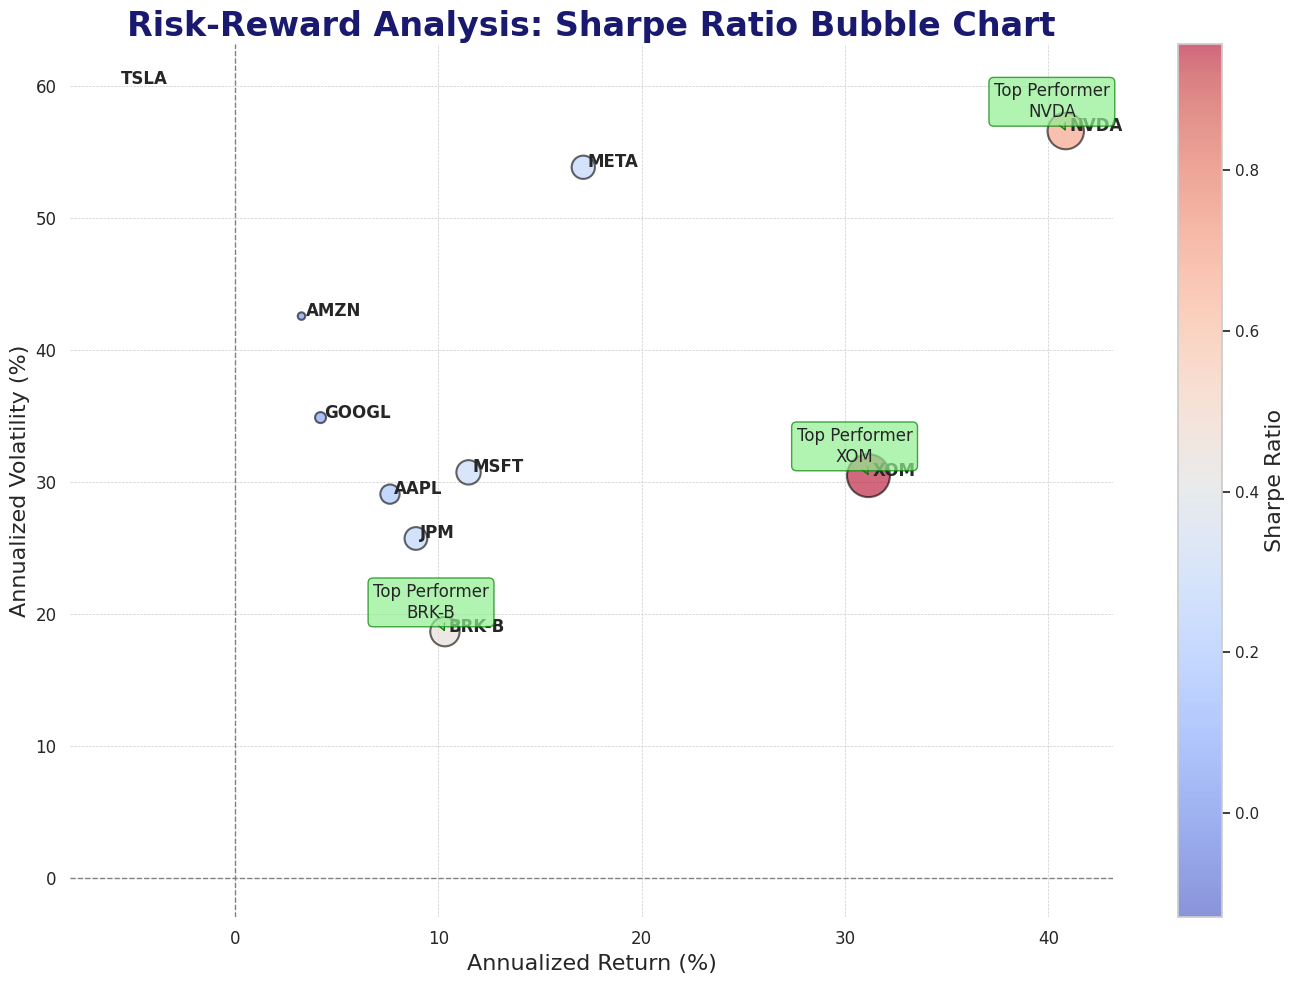

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers for analysis
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'NVDA', 'XOM', 'META', 'BRK-B']

# Download the historical adjusted closing prices for the past 2 years
data = yf.download(tickers, start='2022-01-01', end='2023-12-31')['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate annualized return and annualized volatility
annualized_return = daily_returns.mean() * 252  # 252 trading days in a year
annualized_volatility = daily_returns.std() * np.sqrt(252)

# Assume risk-free rate of return (e.g., 2% annual risk-free rate)
risk_free_rate = 0.02

# Calculate the Sharpe Ratio for each stock
sharpe_ratios = (annualized_return - risk_free_rate) / annualized_volatility

# Create a DataFrame for the analysis
risk_return_df = pd.DataFrame({
    'Stock': annualized_return.index,
    'Annualized Return': annualized_return.values * 100,  # Convert to percentage
    'Annualized Volatility': annualized_volatility.values * 100,  # Convert to percentage
    'Sharpe Ratio': sharpe_ratios.values
})

# Set up Seaborn style and create the bubble chart
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Create the bubble chart
scatter = plt.scatter(
    x=risk_return_df['Annualized Return'],
    y=risk_return_df['Annualized Volatility'],
    s=risk_return_df['Sharpe Ratio'] * 1000,  # Scale bubble size based on Sharpe Ratio
    alpha=0.6, c=risk_return_df['Sharpe Ratio'], cmap='coolwarm', edgecolor='black', linewidth=1.5
)

# Add annotations for each stock
for i, row in risk_return_df.iterrows():
    plt.text(row['Annualized Return'] + 0.2, row['Annualized Volatility'], row['Stock'], fontsize=12, fontweight='bold')

# Highlight the top 3 performers based on Sharpe Ratio
top_performers = risk_return_df.nlargest(3, 'Sharpe Ratio')
for _, row in top_performers.iterrows():
    plt.annotate(f"Top Performer\n{row['Stock']}",
                 (row['Annualized Return'], row['Annualized Volatility']),
                 textcoords="offset points", xytext=(-10, 10), ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='green', facecolor='lightgreen', alpha=0.7),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0", color='green'))

# Add titles and labels
plt.title("Risk-Reward Analysis: Sharpe Ratio Bubble Chart", fontsize=24, weight='bold', color='midnightblue')
plt.xlabel("Annualized Return (%)", fontsize=16)
plt.ylabel("Annualized Volatility (%)", fontsize=16)

# Add color bar to represent Sharpe Ratios
cbar = plt.colorbar(scatter)
cbar.set_label("Sharpe Ratio", fontsize=16)

# Add grid and formatting
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

# Show the final plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-24-1dcc80b1e6b7>:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



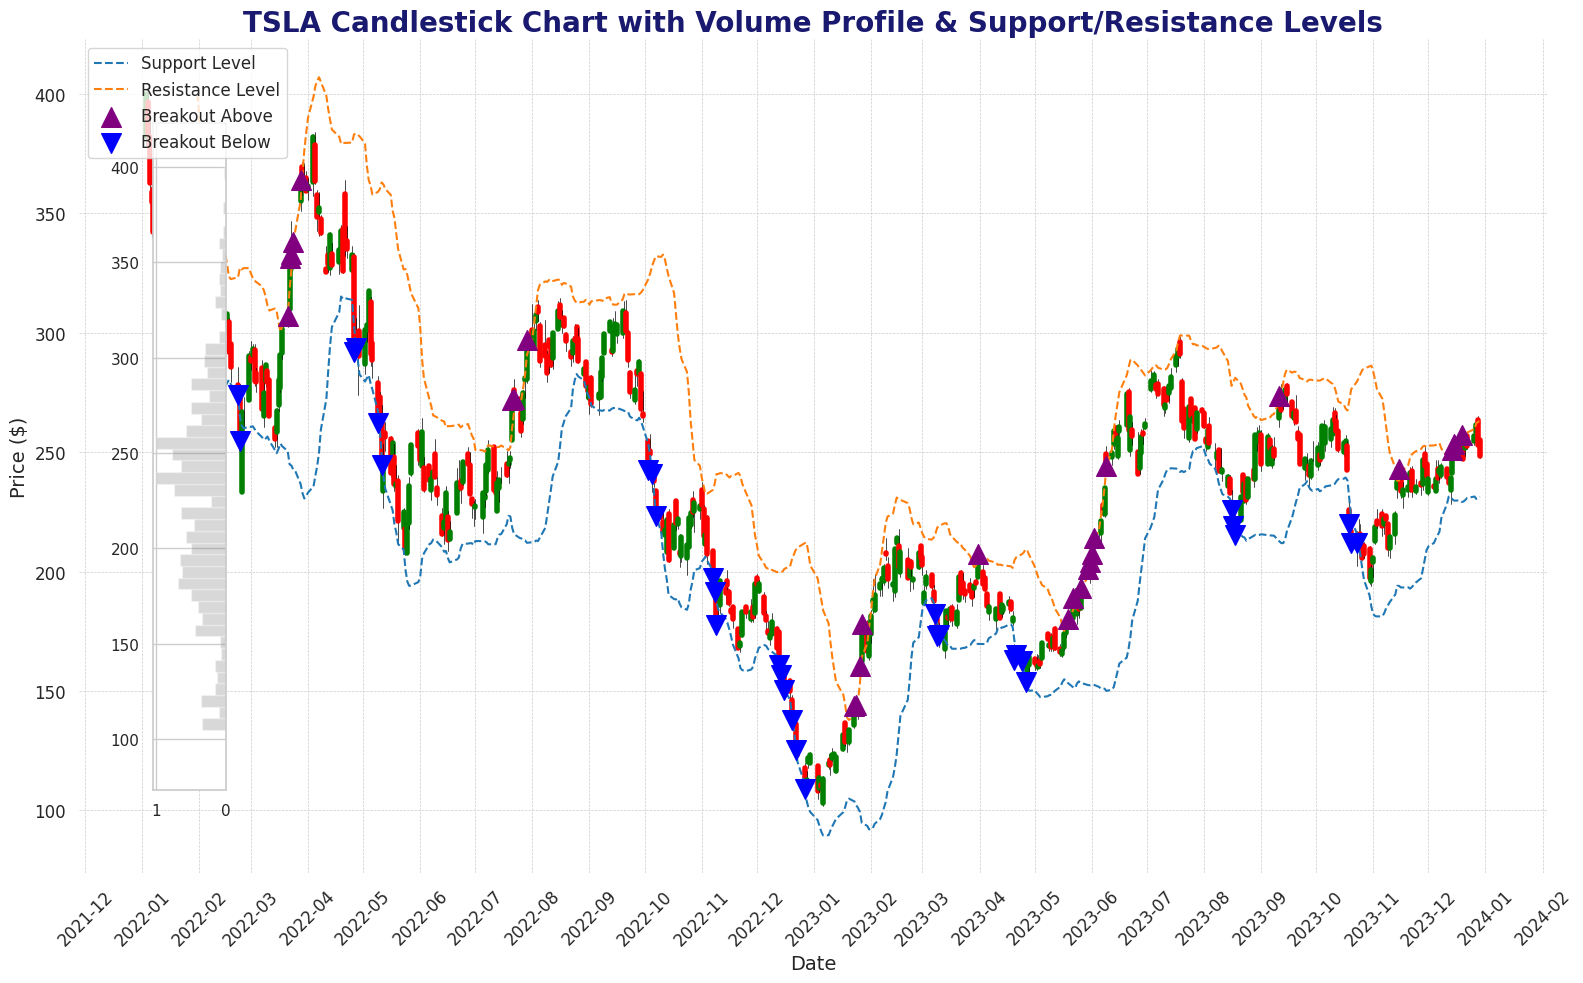

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

# Download historical data for a specific stock (e.g., Tesla - TSLA)
ticker = 'TSLA'
data = yf.download(ticker, start='2022-01-01', end='2023-12-31')

# Calculate Support and Resistance Levels
def find_support_resistance(df, window=20, std_factor=2):
    rolling_mean = df['Adj Close'].rolling(window=window).mean()
    rolling_std = df['Adj Close'].rolling(window=window).std()
    support = rolling_mean - (std_factor * rolling_std)
    resistance = rolling_mean + (std_factor * rolling_std)
    return support, resistance

data['Support'], data['Resistance'] = find_support_resistance(data)

# Calculate Volume Profile (trading volume at each price level)
price_bins = np.linspace(data['Low'].min(), data['High'].max(), 50)
volume_profile = data.groupby(pd.cut(data['Close'], bins=price_bins)).Volume.sum()
volume_profile = volume_profile / volume_profile.max()  # Normalize for better visualization

# Set up the main figure and axis
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 10))

# Plot Candlestick Chart
for idx, row in data.iterrows():
    color = 'green' if row['Close'] > row['Open'] else 'red'
    ax.plot([row.name, row.name], [row['Low'], row['High']], color='black', linewidth=0.5)  # High-Low line
    ax.plot([row.name, row.name], [row['Open'], row['Close']], color=color, linewidth=4)    # Open-Close line

# Plot Support and Resistance Levels
ax.plot(data.index, data['Support'], linestyle='--', color='#1f77b4', label='Support Level')
ax.plot(data.index, data['Resistance'], linestyle='--', color='#ff7f0e', label='Resistance Level')

# Highlight Breakouts (Close Price crosses above Resistance or below Support)
breakout_above = data[data['Close'] > data['Resistance']]
breakout_below = data[data['Close'] < data['Support']]
ax.scatter(breakout_above.index, breakout_above['Close'], color='purple', marker='^', s=200, label='Breakout Above', zorder=3)
ax.scatter(breakout_below.index, breakout_below['Close'], color='blue', marker='v', s=200, label='Breakout Below', zorder=3)

# Volume Profile on the Y-axis
ax_volume = ax.inset_axes([0.05, 0.1, 0.05, 0.8])  # [left, bottom, width, height]
ax_volume.barh(price_bins[:-1], volume_profile, color='gray', alpha=0.3, height=(price_bins[1] - price_bins[0]))
ax_volume.set_ylim(ax.get_ylim())
ax_volume.invert_xaxis()  # Align the volume bars to the left

# Formatting
ax.set_title(f"{ticker} Candlestick Chart with Volume Profile & Support/Resistance Levels", fontsize=20, weight='bold', color='midnightblue')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Date Formatting for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Add a legend
ax.legend(fontsize=12, loc='upper left')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
sns.despine(left=True, bottom=True)

# Show the final plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-25-fd459d15c87e>:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



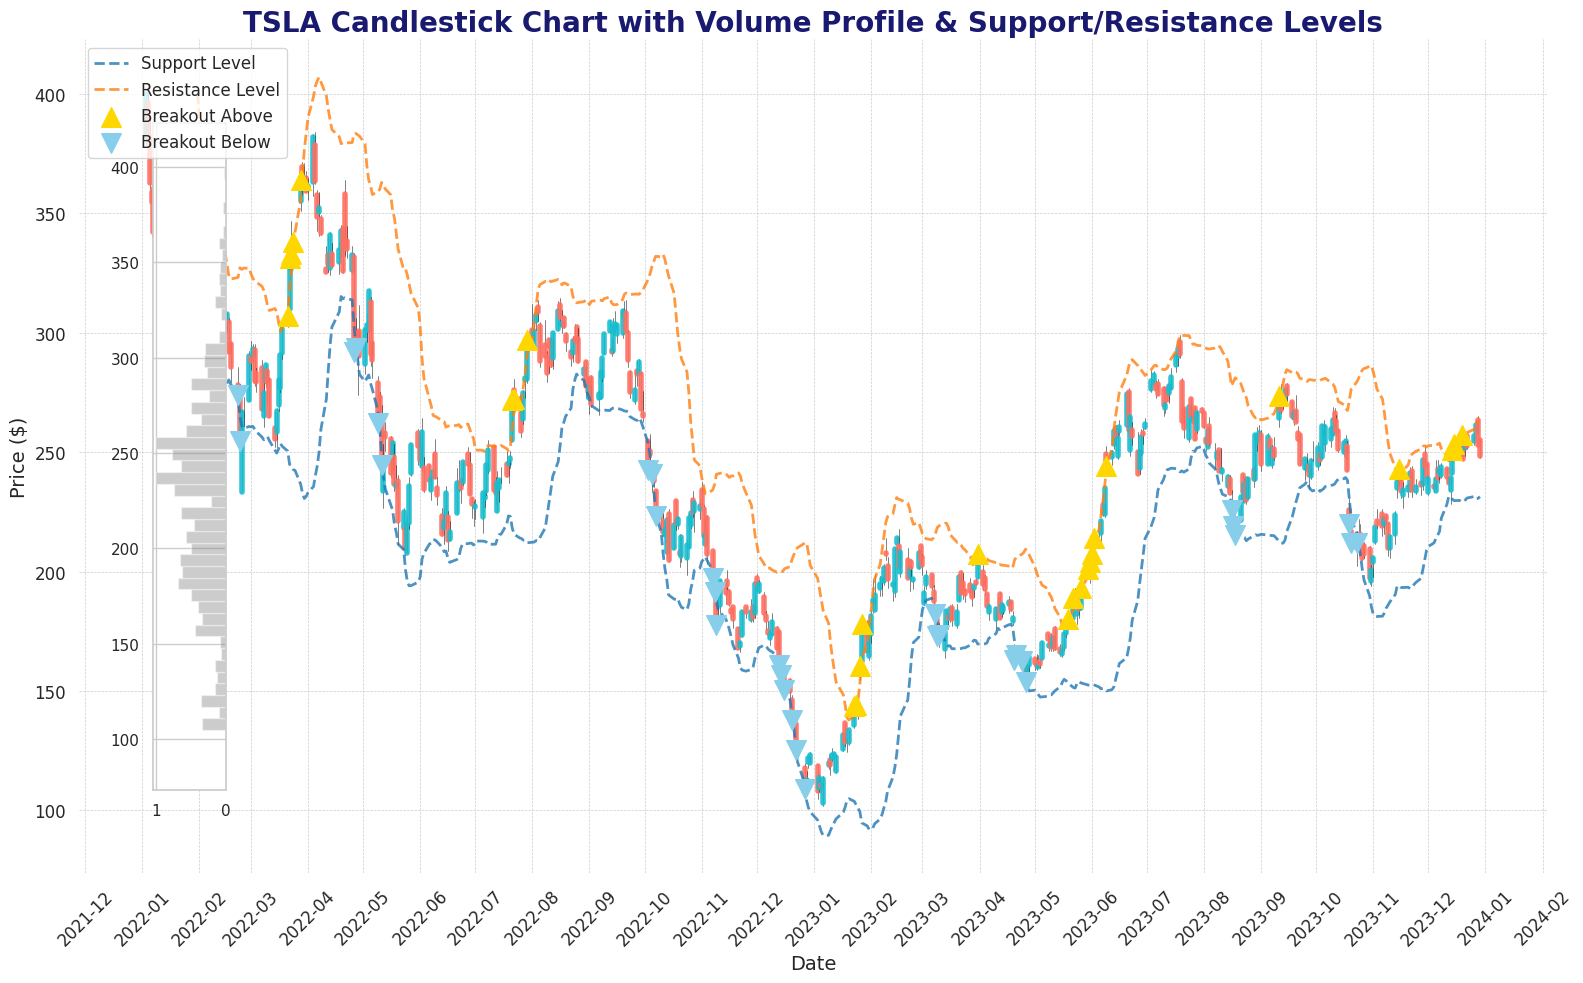

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

# Download historical data for a specific stock (e.g., Tesla - TSLA)
ticker = 'TSLA'
data = yf.download(ticker, start='2022-01-01', end='2023-12-31')

# Calculate Support and Resistance Levels
def find_support_resistance(df, window=20, std_factor=2):
    rolling_mean = df['Adj Close'].rolling(window=window).mean()
    rolling_std = df['Adj Close'].rolling(window=window).std()
    support = rolling_mean - (std_factor * rolling_std)
    resistance = rolling_mean + (std_factor * rolling_std)
    return support, resistance

data['Support'], data['Resistance'] = find_support_resistance(data)

# Calculate Volume Profile (trading volume at each price level)
price_bins = np.linspace(data['Low'].min(), data['High'].max(), 50)
volume_profile = data.groupby(pd.cut(data['Close'], bins=price_bins)).Volume.sum()
volume_profile = volume_profile / volume_profile.max()  # Normalize for better visualization

# Set up the main figure and axis with a refined Seaborn style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 10))

# Color settings for better aesthetics
bullish_color = '#17BECF'  # Soft teal for bullish candlesticks
bearish_color = '#FF6F61'  # Soft coral for bearish candlesticks
support_color = '#1f77b4'  # Subtle blue for support lines
resistance_color = '#ff7f0e'  # Soft orange for resistance lines
breakout_above_color = '#FFD700'  # Gold for breakout above
breakout_below_color = '#87CEEB'  # Sky blue for breakout below

# Plot Candlestick Chart
for idx, row in data.iterrows():
    color = bullish_color if row['Close'] > row['Open'] else bearish_color
    ax.plot([row.name, row.name], [row['Low'], row['High']], color='black', linewidth=0.5, alpha=0.7)  # High-Low line
    ax.plot([row.name, row.name], [row['Open'], row['Close']], color=color, linewidth=4, alpha=0.9)  # Open-Close line

# Plot Support and Resistance Levels
ax.plot(data.index, data['Support'], linestyle='--', color=support_color, label='Support Level', linewidth=2, alpha=0.8)
ax.plot(data.index, data['Resistance'], linestyle='--', color=resistance_color, label='Resistance Level', linewidth=2, alpha=0.8)

# Highlight Breakouts (Close Price crosses above Resistance or below Support)
breakout_above = data[data['Close'] > data['Resistance']]
breakout_below = data[data['Close'] < data['Support']]
ax.scatter(breakout_above.index, breakout_above['Close'], color=breakout_above_color, marker='^', s=200, label='Breakout Above', zorder=3)
ax.scatter(breakout_below.index, breakout_below['Close'], color=breakout_below_color, marker='v', s=200, label='Breakout Below', zorder=3)

# Volume Profile on the Y-axis
ax_volume = ax.inset_axes([0.05, 0.1, 0.05, 0.8])  # [left, bottom, width, height]
ax_volume.barh(price_bins[:-1], volume_profile, color='gray', alpha=0.4, height=(price_bins[1] - price_bins[0]))
ax_volume.set_ylim(ax.get_ylim())
ax_volume.invert_xaxis()  # Align the volume bars to the left

# Formatting
ax.set_title(f"{ticker} Candlestick Chart with Volume Profile & Support/Resistance Levels", fontsize=20, weight='bold', color='midnightblue')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Date Formatting for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Add a legend
ax.legend(fontsize=12, loc='upper left')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
sns.despine(left=True, bottom=True)

# Show the final plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  30 of 30 completed


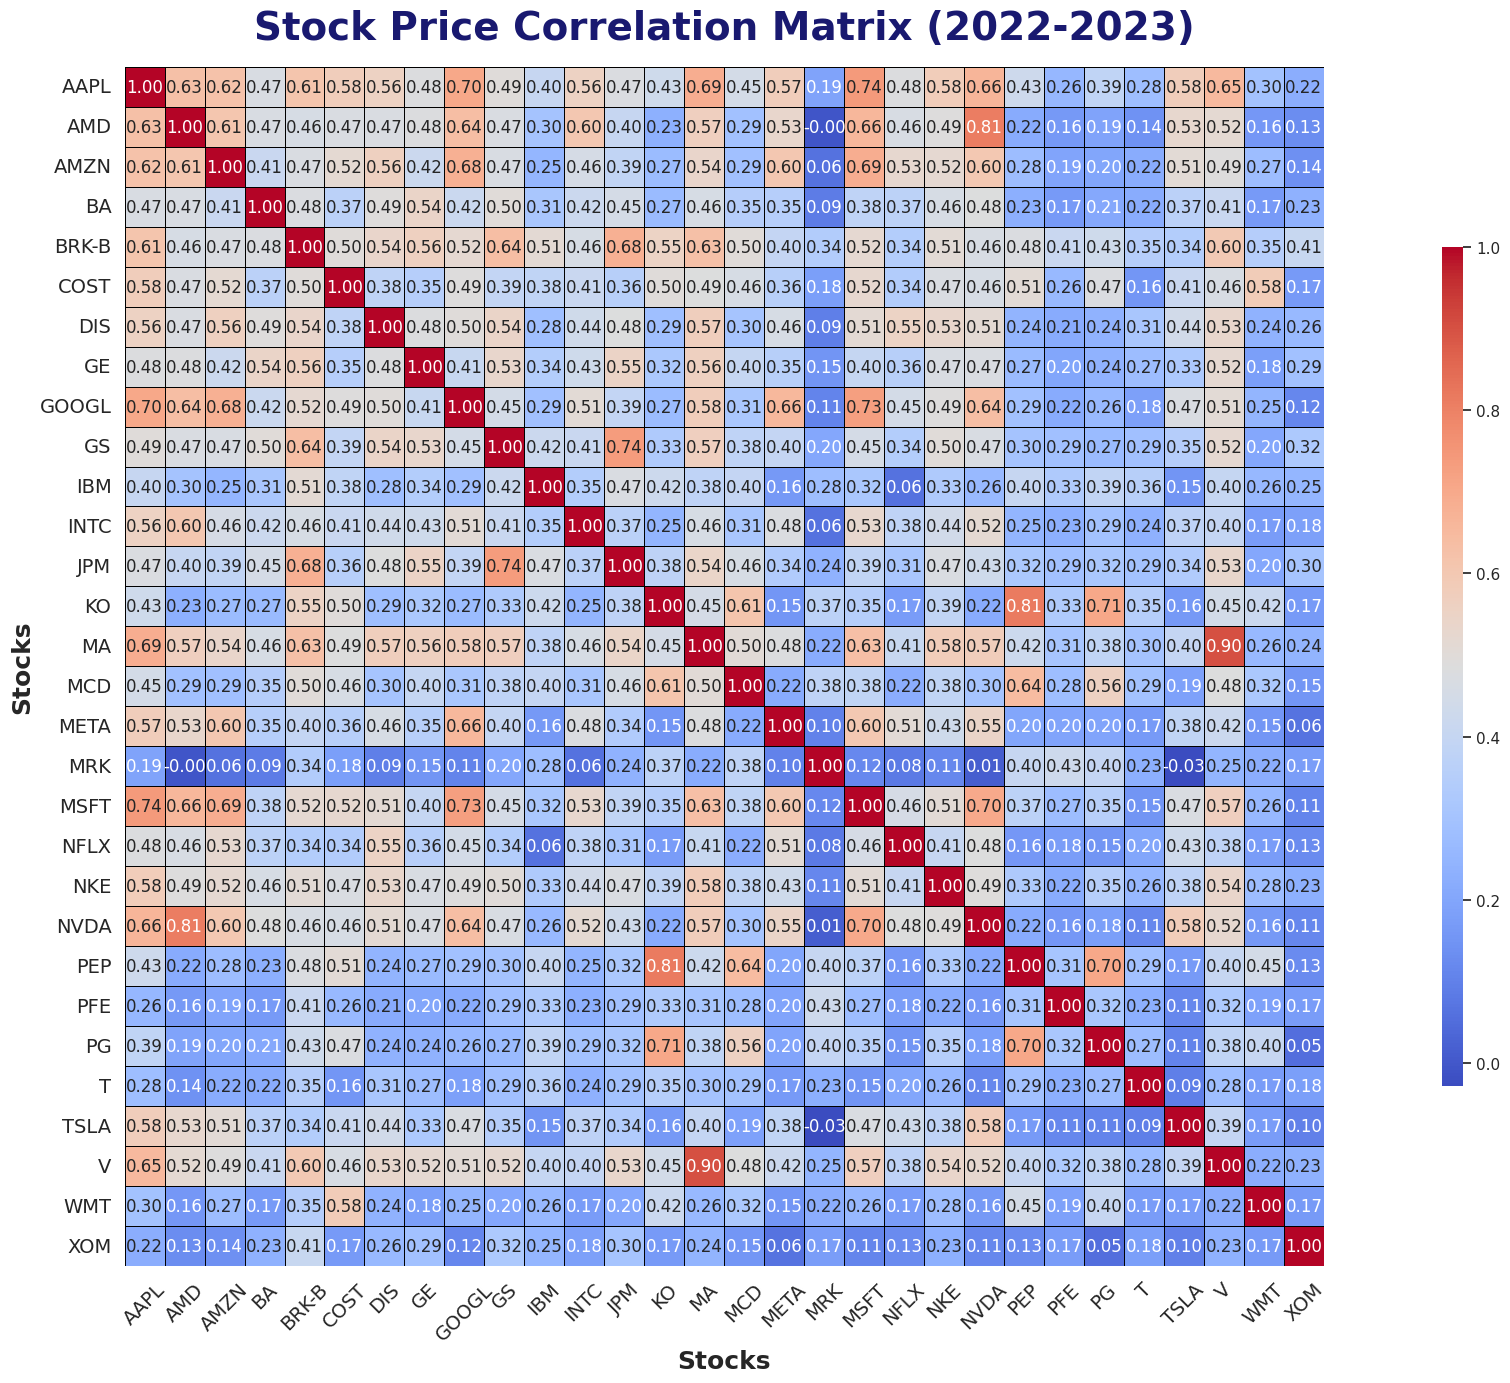

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a list of stocks for correlation analysis
stocks = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'NVDA', 'XOM', 'META', 'BRK-B',
    'V', 'MA', 'DIS', 'NFLX', 'NKE', 'PFE', 'MRK', 'BA', 'KO', 'MCD',
    'COST', 'PEP', 'IBM', 'INTC', 'GS', 'WMT', 'T', 'PG', 'GE', 'AMD'
]

# Download historical adjusted closing prices for the selected stocks (last 2 years)
data = yf.download(stocks, start='2022-01-01', end='2023-12-31')['Adj Close']

# Calculate the daily returns
daily_returns = data.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Set up the figure for a large and aesthetic heatmap
plt.figure(figsize=(24, 14))

# Create a vibrant heatmap for stock correlations
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',          # Diverging color palette
    annot=True,               # Show the correlation values in each cell
    fmt=".2f",                # Format values to 2 decimal places
    linewidths=0.5,           # Add gridlines
    linecolor='black',        # Black gridlines for better separation
    cbar_kws={'shrink': 0.7, 'aspect': 40},  # Custom color bar settings
    square=True               # Make cells square for a balanced look
)

# Aesthetic Customizations
plt.title("Stock Price Correlation Matrix (2022-2023)", fontsize=28, fontweight='bold', color='midnightblue', pad=20)
plt.xlabel("Stocks", fontsize=18, fontweight='bold')
plt.ylabel("Stocks", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Display the heatmap
plt.tight_layout()
plt.show()


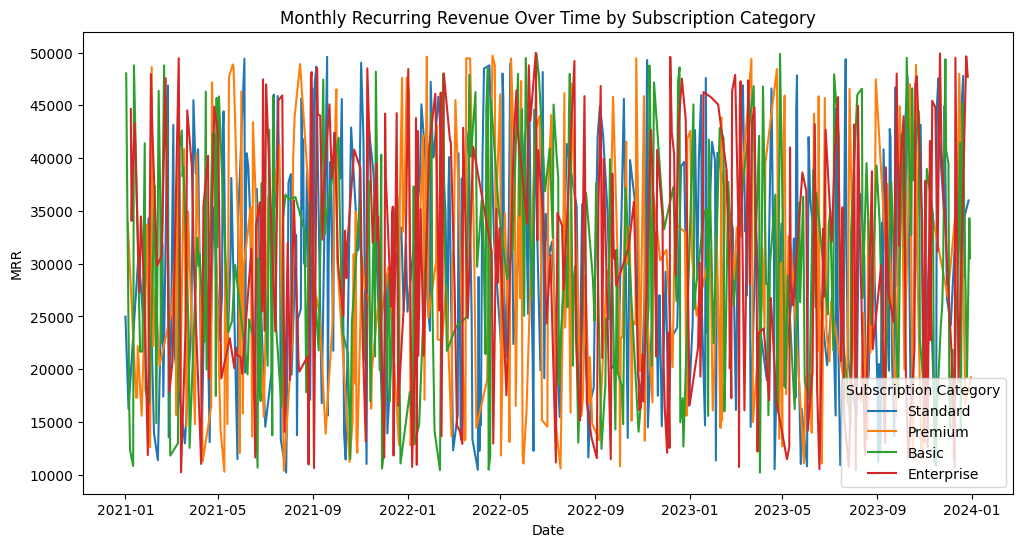

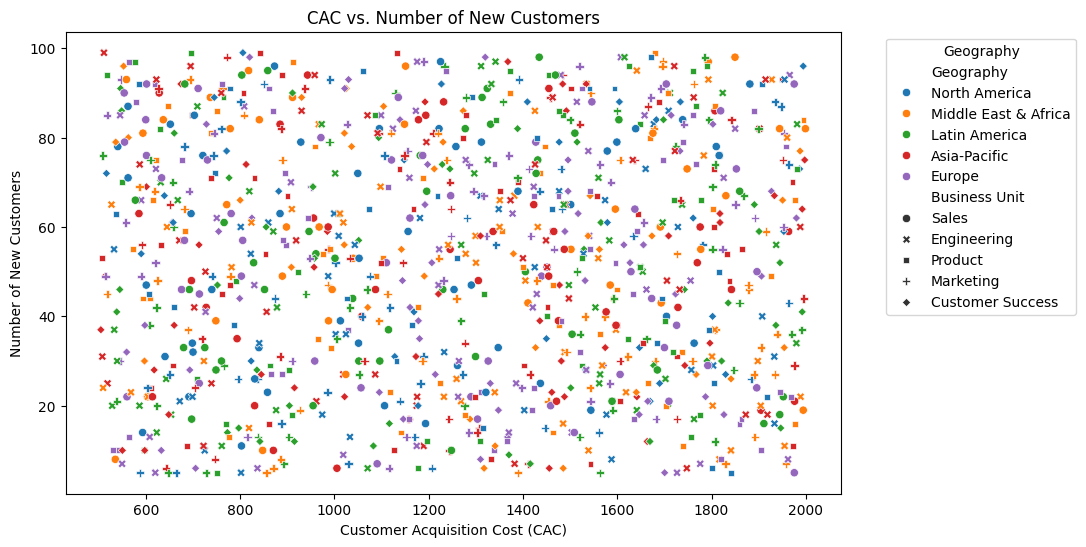

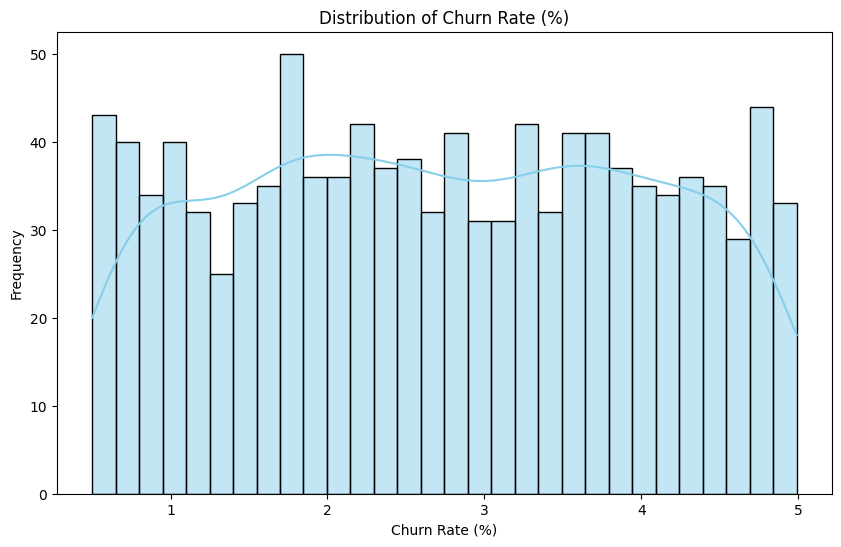

<ipython-input-1-485861bbfa79>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Subscription Category', y='Net Profit', palette='Set2')


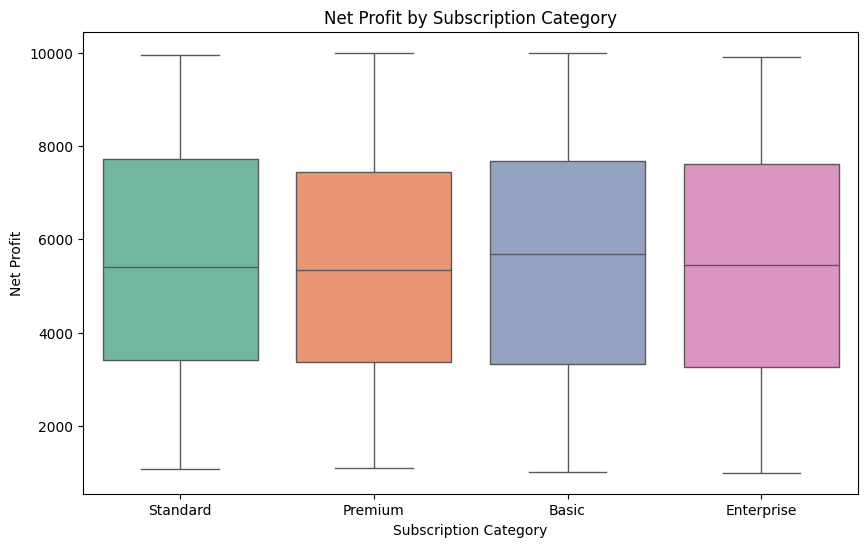

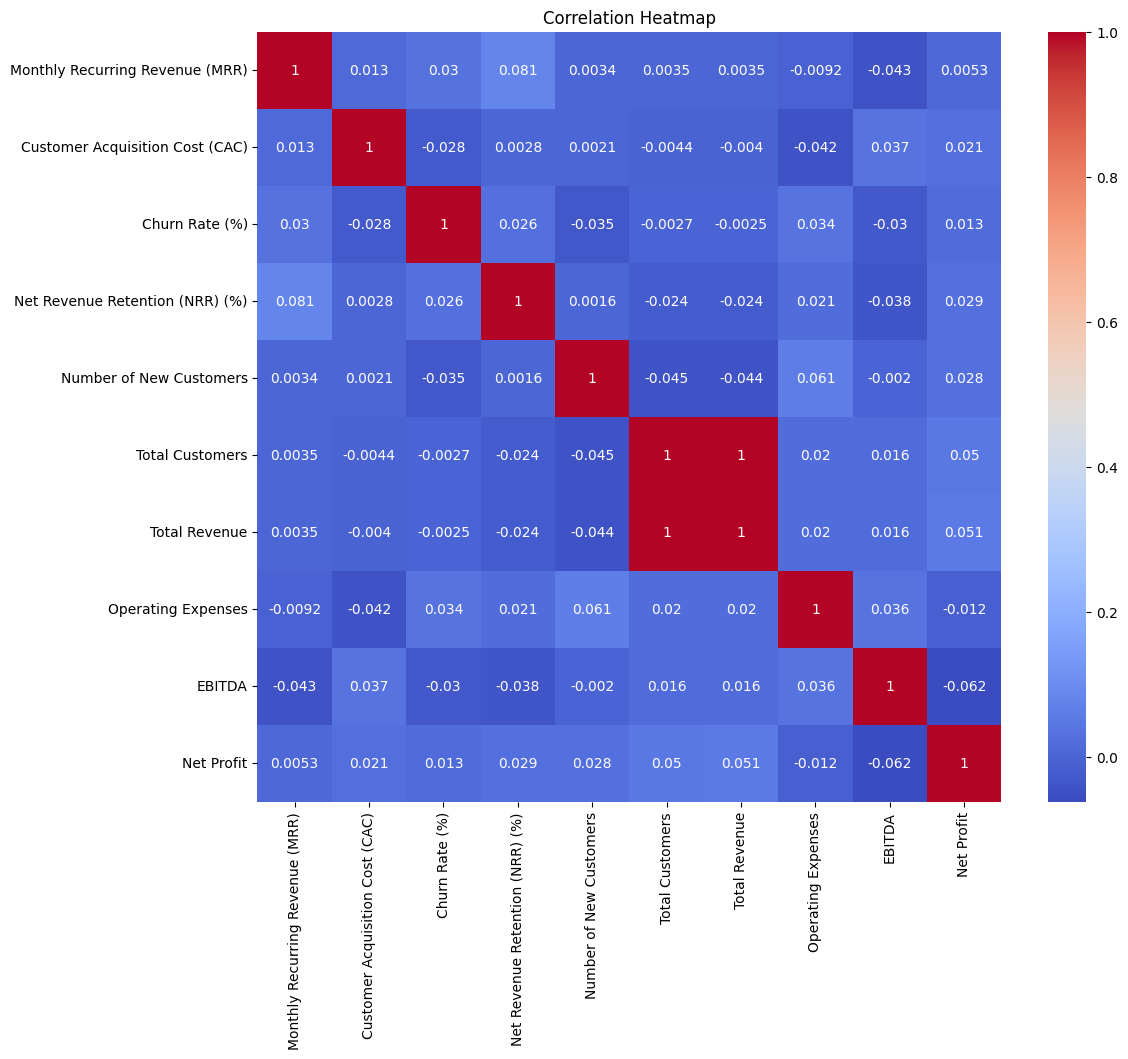

<ipython-input-1-485861bbfa79>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_geo, x='Geography', y='Total Revenue', palette='viridis')


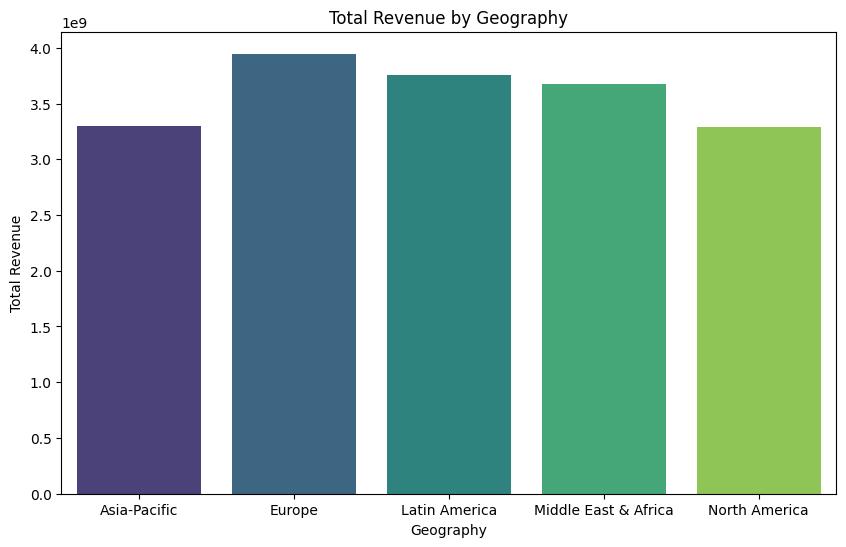

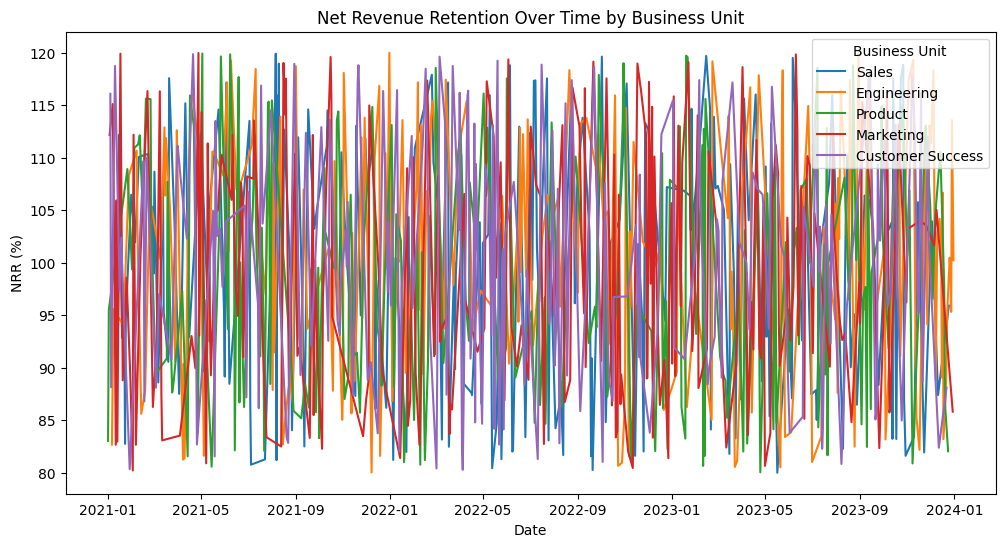

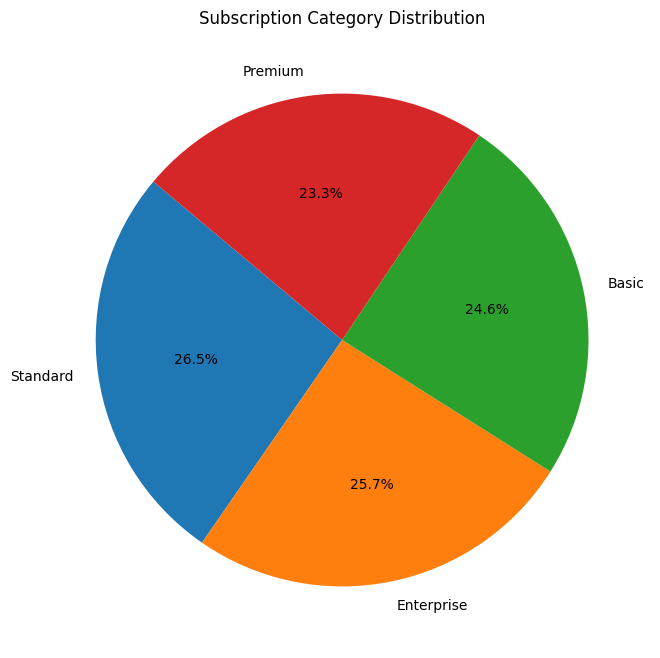

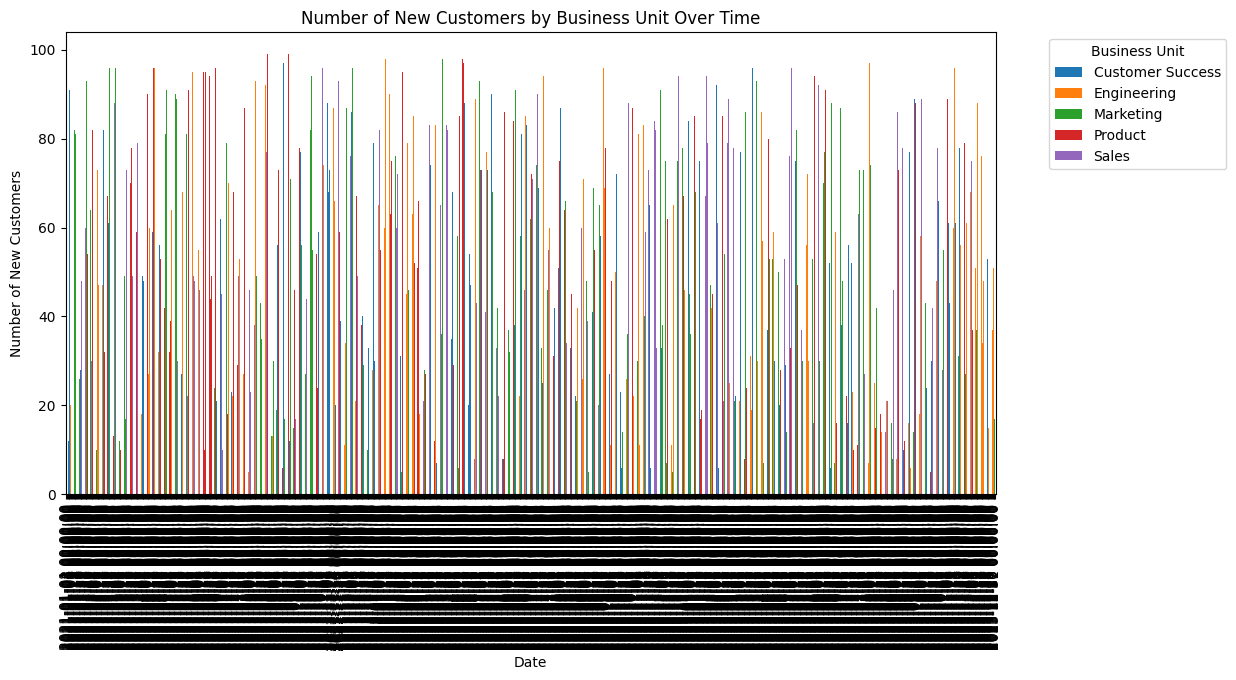

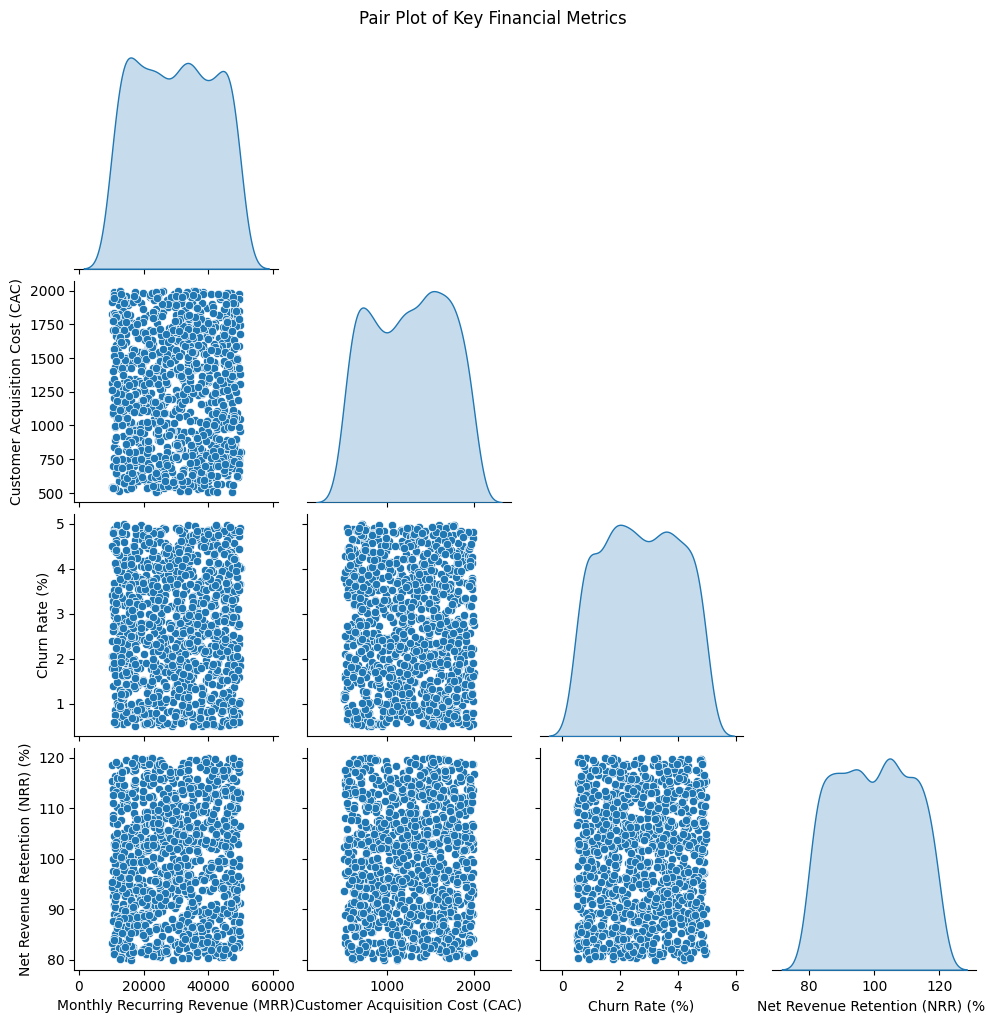

In [ ]:
# Install necessary libraries (if not already installed)
!pip install openpyxl seaborn plotly --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Excel data
df = pd.read_excel('/content/Enhanced_SaaS_Company_Financial_Sales_Data.xlsx', engine='openpyxl')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Visualization 1: Time Series Plot of Monthly Recurring Revenue (MRR) Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Monthly Recurring Revenue (MRR)', hue='Subscription Category')
plt.title('Monthly Recurring Revenue Over Time by Subscription Category')
plt.xlabel('Date')
plt.ylabel('MRR')
plt.legend(title='Subscription Category')
plt.show()

# Visualization 2: Scatter Plot of Customer Acquisition Cost (CAC) vs. Number of New Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Customer Acquisition Cost (CAC)', y='Number of New Customers', hue='Geography', style='Business Unit')
plt.title('CAC vs. Number of New Customers')
plt.xlabel('Customer Acquisition Cost (CAC)')
plt.ylabel('Number of New Customers')
plt.legend(title='Geography', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Visualization 3: Histogram of Churn Rate (%)
plt.figure(figsize=(10, 6))
sns.histplot(df['Churn Rate (%)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Churn Rate (%)')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Box Plot of Net Profit by Subscription Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Subscription Category', y='Net Profit', palette='Set2')
plt.title('Net Profit by Subscription Category')
plt.xlabel('Subscription Category')
plt.ylabel('Net Profit')
plt.show()

# Visualization 5: Heatmap of Correlation Among Numerical Variables
plt.figure(figsize=(12, 10))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 6: Bar Chart of Total Revenue by Geography
revenue_by_geo = df.groupby('Geography')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_geo, x='Geography', y='Total Revenue', palette='viridis')
plt.title('Total Revenue by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Revenue')
plt.show()

# Visualization 7: Line Chart of Net Revenue Retention (NRR) Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Net Revenue Retention (NRR) (%)', hue='Business Unit')
plt.title('Net Revenue Retention Over Time by Business Unit')
plt.xlabel('Date')
plt.ylabel('NRR (%)')
plt.legend(title='Business Unit')
plt.show()

# Visualization 8: Pie Chart of Subscription Categories
subscription_counts = df['Subscription Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Category Distribution')
plt.show()

# Visualization 9: Stacked Bar Chart of Number of New Customers by Business Unit
new_customers_by_bu = df.pivot_table(index='Date', columns='Business Unit', values='Number of New Customers', aggfunc='sum').fillna(0)
new_customers_by_bu.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of New Customers by Business Unit Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Customers')
plt.legend(title='Business Unit', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Visualization 10: Pair Plot of Key Financial Metrics
sns.pairplot(df[['Monthly Recurring Revenue (MRR)', 'Customer Acquisition Cost (CAC)', 'Churn Rate (%)', 'Net Revenue Retention (NRR) (%)']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Financial Metrics', y=1.02)
plt.show()


             Category  Budgeted  Actual  Variance  Variance % Variance Type
0             Revenue   1000000  950000    -50000   -5.000000     Favorable
1                COGS    400000  420000     20000    5.000000   Unfavorable
2        Gross Profit    600000  530000    -70000  -11.666667     Favorable
3  Operating Expenses    200000  210000     10000    5.000000   Unfavorable
4              EBITDA    400000  320000    -80000  -20.000000     Favorable
5          Net Income    250000  180000    -70000  -28.000000     Favorable


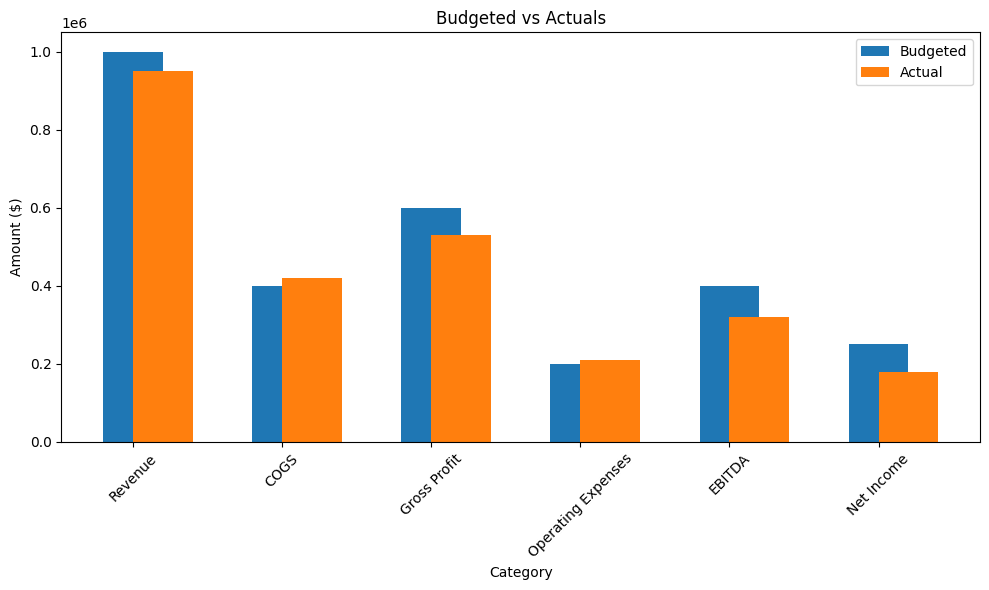

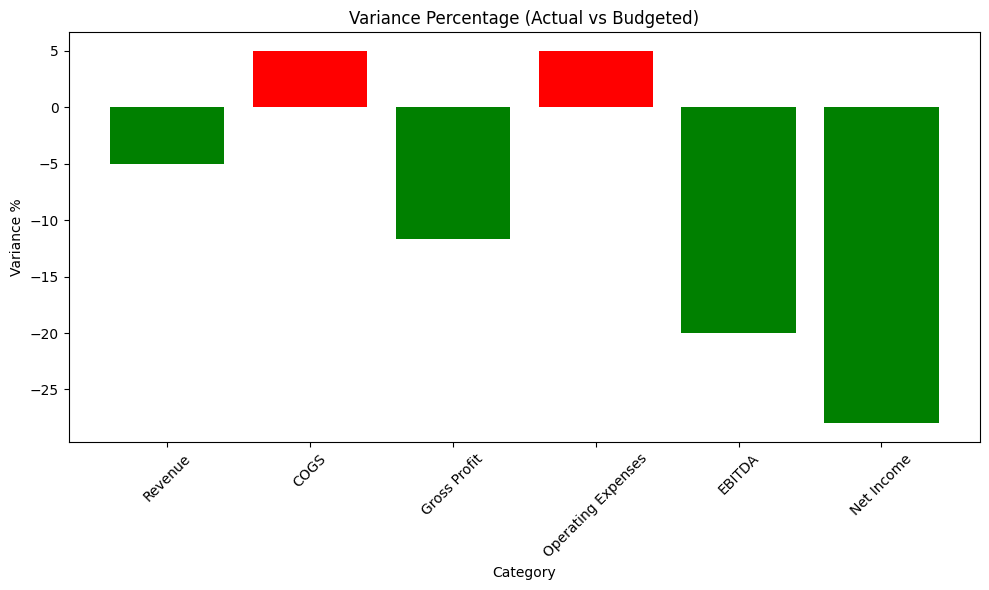

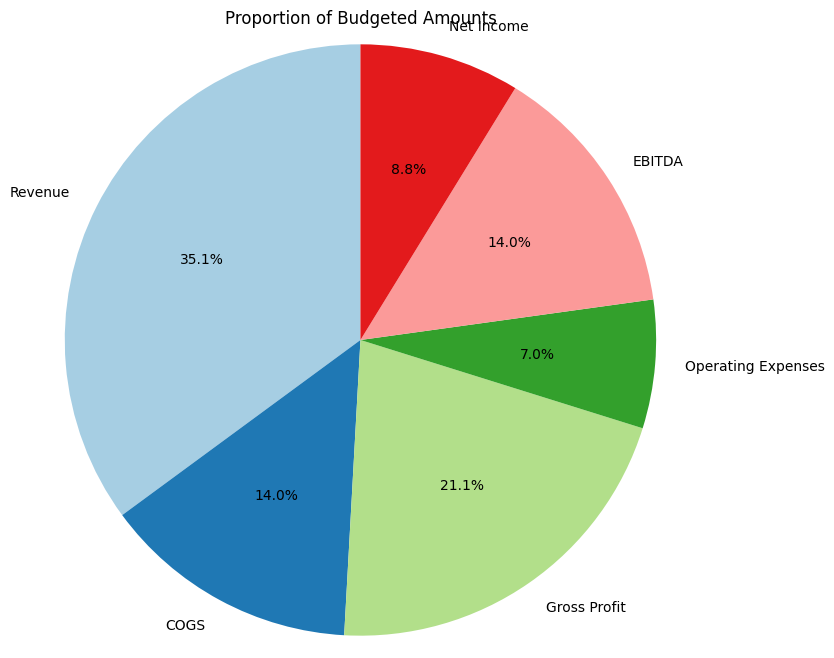

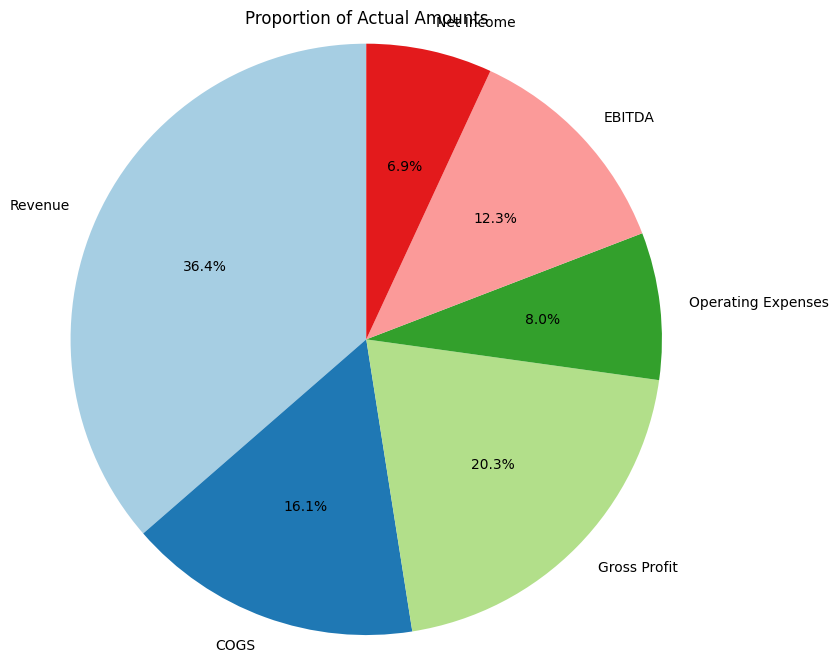

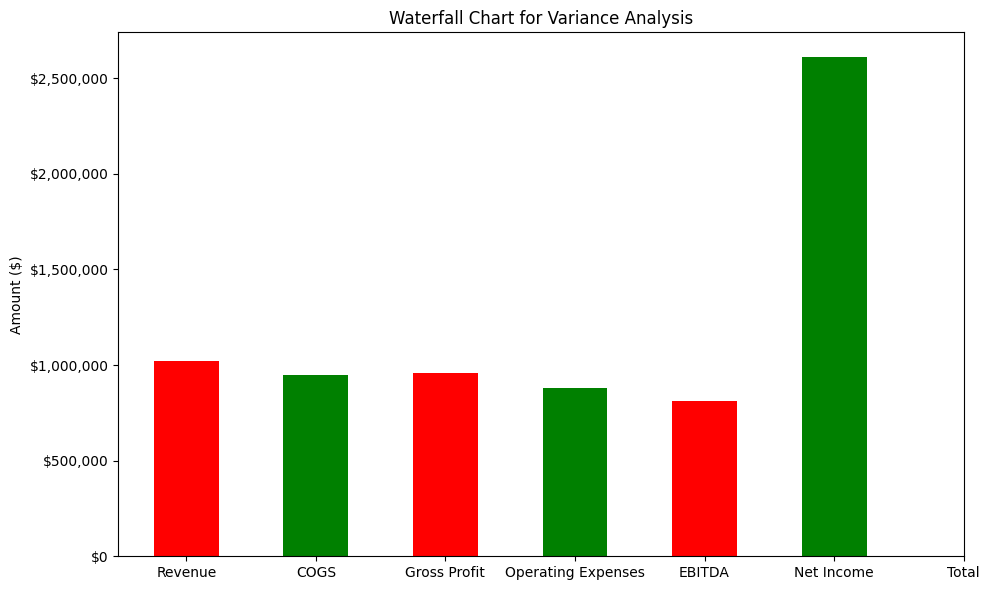

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dummy data for FP&A budgeting (Revenue and Expenses)
data = {
    'Category': ['Revenue', 'COGS', 'Gross Profit', 'Operating Expenses', 'EBITDA', 'Net Income'],
    'Budgeted': [1000000, 400000, 600000, 200000, 400000, 250000],
    'Actual': [950000, 420000, 530000, 210000, 320000, 180000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate Variance
df['Variance'] = df['Actual'] - df['Budgeted']  # Absolute variance
df['Variance %'] = (df['Variance'] / df['Budgeted']) * 100  # Percentage variance

# Classify variance as favorable/unfavorable
df['Variance Type'] = np.where(df['Variance'] >= 0, 'Unfavorable', 'Favorable')

# Print the DataFrame to visually inspect the analysis
print(df)

# Visualizations

# 1. Bar Chart: Actual vs. Budgeted
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Budgeted'], width=0.4, label='Budgeted', align='center')
plt.bar(df['Category'], df['Actual'], width=0.4, label='Actual', align='edge')

plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.title('Budgeted vs Actuals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Variance Percentage (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Variance %'], color=np.where(df['Variance %'] < 0, 'green', 'red'))

plt.xlabel('Category')
plt.ylabel('Variance %')
plt.title('Variance Percentage (Actual vs Budgeted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Pie Chart: Proportion of Budgeted vs Actuals
plt.figure(figsize=(8, 8))
plt.pie(df['Budgeted'], labels=df['Category'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, radius=1.2)
plt.title('Proportion of Budgeted Amounts')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(df['Actual'], labels=df['Category'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, radius=1.2)
plt.title('Proportion of Actual Amounts')
plt.show()

# 4. Waterfall Chart for Variance
from matplotlib.ticker import FuncFormatter

def plot_waterfall(df, title="Waterfall Chart for Variance Analysis"):
    fig, ax = plt.subplots(figsize=(10, 6))

    bars = np.append(df['Budgeted'][0], df['Variance'][1:].cumsum() + df['Budgeted'][0])
    bars = np.append(bars, df['Actual'].sum())

    step_values = np.append(df['Budgeted'][0], df['Variance'])

    bar_colors = ['green' if x < 0 else 'red' for x in step_values]

    ax.bar(df.index, bars[1:], color=bar_colors, label="Variance", width=0.5)

    ax.set_xticks(np.arange(df.shape[0] + 1))
    ax.set_xticklabels(list(df['Category']) + ['Total'])
    ax.set_ylabel('Amount ($)')
    ax.set_title(title)

    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()

plot_waterfall(df)
